# Read in data

In [1]:
import pandas as pd
import json
import numpy as np
import string
import functools as ft
import math

# https://stackoverflow.com/questions/74918614/error-importing-seaborn-module-attributeerror
def dummy_npwarn_decorator_factory():
    def npwarn_decorator(x):
        return x
    return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

import pingouin as pg


import seaborn as sns
import matplotlib.pyplot as plt 

## Read in country sheet

In [2]:
def read_in_country_sheet(filename):
    
    # nrows = 194 because there are more rows in the file (to compute totals) which we want to ignore
    df = pd.read_excel(filename, header=[1,2], nrows=194)
    headers = df.columns
    # Drop the last column which just lists yes and no as the possible entries for certain columns
    df = df.drop(headers[-1], axis=1)
    return df

df = read_in_country_sheet('Landen mapping sheet version Sep 2024.xlsx')
df

Landencode               Land  Land (voor kaart)  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                  AFG       Afghanistan         Afghanistan   
1                  ALB            Albania            Albania   
2                  DZA            Algeria            Algeria   
3                  AND            Andorra            Andorra   
4                  AGO             Angola             Angola   
..                 ...                ...                ...   
189                VEN          Venezuela          Venezuela   
190                VNM            Vietnam            Vietnam   
191                YEM              Yemen              Yemen   
192                ZMB             Zambia             Zambia   
193                ZWE           Zimbabwe           Zimbabwe   

       Land korte naam          Bevolking                BNP  \
    Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1   
0          Afghanistan           42239854                NaN   
1              Albania            2832439       1.891638e+10   
2              Algeria           45606480       1.949984e+11   
3              Andorra              80088       3.352031e+09   
4               Angola           36684202       1.067828e+11   
..                 ...                ...                ...   
189          Venezuela           28838499                NaN   
190            Vietnam           98858950       4.088024e+11   
191              Yemen           34449825                NaN   
192             Zambia           20569737       2.916378e+10   
193           Zimbabwe           16665409       2.736663e+10   

         Jaar van data Attendance NSA meetings               ...  \
    Unnamed: 6_level_1              Copenhagen Jeddah Malta  ...   
0                  NaN                     NaN    NaN    no  ...   
1               2022.0                     NaN    NaN   yes  ...   
2               2022.0                     NaN    NaN    no  ...   
3               2022.0                     NaN    NaN    no  ...   
4               2022.0                     NaN    NaN    no  ...   
..                 ...                     ...    ...   ...  ...   
189                NaN                     NaN    NaN    no  ...   
190             2022.0                     NaN    NaN    no  ...   
191                NaN                     NaN    NaN    no  ...   
192             2022.0                     NaN    yes    no  ...   
193             2022.0                     NaN    NaN    no  ...   

    AVVN Resolutie 11 juli 2024                                      \
                        Against Abstain Absent Summary July 11 2024   
0                           NaN     NaN    yes               Absent   
1                           NaN     NaN    NaN             In favor   
2                           NaN     yes    NaN              Abstain   
3                           NaN     NaN    NaN             In favor   
4                           NaN     yes    NaN              Abstain   
..                          ...     ...    ...                  ...   
189                         NaN     NaN    yes               Absent   
190                         NaN     yes    NaN              Abstain   
191                         NaN     yes    NaN              Abstain   
192                         NaN     NaN    NaN             In favor   
193                         NaN     yes    NaN              Abstain   

    Lid internationale organisaties                          
                               NAVO BRICS  G7 ASEAN  EU SCO  
0                                no    no  no    no  no  no  
1                               yes    no  no    no  no  no  
2                                no    no  no    no  no  no  
3                                no    no  no    no  no  no  
4                                no    no  no    no  no  no  
..                              ...   ...  ..   ...  ..  ..  
189                              no    no

In [3]:
def dump_json(dictionary, filename):
    with open(filename, 'w') as f:
        json.dump(dictionary, f, indent=4)

def create_country_dict(country_df, filename=None):
    countries = country_df[['Landencode', 'Land', 'Land (voor kaart)']]
    countries.columns = countries.columns.map(lambda x : x[0])
    print(countries.columns)
    countries = countries.set_index('Landencode')
    print(countries)
    country_dict = countries.to_dict(orient='index')#, index=False)
    print(country_dict)
    country_dict_new = {}
    for country in country_dict: 
        land = country_dict[country]['Land']
        land_kaart = country_dict[country]['Land (voor kaart)']
        country_dict_new[country] = [land]
        if land != land_kaart:
            country_dict_new[country].append(land_kaart)
    if filename is not None:
        dump_json(country_dict_new, filename)
    return country_dict_new

create_country_dict(df, filename="country_xlsx.json")

Index(['Landencode', 'Land', 'Land (voor kaart)'], dtype='object')
                    Land Land (voor kaart)
Landencode                                
AFG         Afghanistan        Afghanistan
ALB              Albania           Albania
DZA              Algeria           Algeria
AND              Andorra           Andorra
AGO               Angola            Angola
...                  ...               ...
VEN            Venezuela         Venezuela
VNM              Vietnam           Vietnam
YEM                Yemen             Yemen
ZMB               Zambia            Zambia
ZWE             Zimbabwe          Zimbabwe

[194 rows x 2 columns]
{'AFG': {'Land': 'Afghanistan ', 'Land (voor kaart)': 'Afghanistan'}, 'ALB': {'Land': 'Albania', 'Land (voor kaart)': 'Albania'}, 'DZA': {'Land': 'Algeria', 'Land (voor kaart)': 'Algeria'}, 'AND': {'Land': 'Andorra', 'Land (voor kaart)': 'Andorra'}, 'AGO': {'Land': 'Angola', 'Land (voor kaart)': 'Angola'}, 'ATG': {'Land': 'Antigua and Barbuda', 'La

{'AFG': ['Afghanistan ', 'Afghanistan'],
 'ALB': ['Albania'],
 'DZA': ['Algeria'],
 'AND': ['Andorra'],
 'AGO': ['Angola'],
 'ATG': ['Antigua and Barbuda'],
 'ARG': ['Argentina'],
 'ARM': ['Armenia'],
 'AUS': ['Australia'],
 'AUT': ['Austria'],
 'AZE': ['Azerbaijan'],
 'BHS': ['Bahamas'],
 'BHR': ['Bahrain'],
 'BGD': ['Bangladesh'],
 'BRB': ['Barbados'],
 'BLR': ['Belarus'],
 'BEL': ['Belgium'],
 'BLZ': ['Belize'],
 'BEN': ['Benin'],
 'BTN': ['Bhutan'],
 'BOL': ['Bolivia'],
 'BIH': ['Bosnia and Herzegovina'],
 'BWA': ['Botswana'],
 'BRA': ['Brazil'],
 'BRN': ['Brunei'],
 'BGR': ['Bulgaria'],
 'BFA': ['Burkina Faso'],
 'BDI': ['Burundi'],
 'CPV': ['Cabo Verde'],
 'KHM': ['Cambodia'],
 'CMR': ['Cameroon'],
 'CAN': ['Canada'],
 'CAF': ['Central African Republic'],
 'TCD': ['Chad'],
 'CHL': ['Chile'],
 'CHN': ['China'],
 'COL': ['Colombia'],
 'COM': ['Comoros'],
 'COG': ['Congo (Congo-Brazzaville)', 'Congo-Brazzaville'],
 'CRI': ['Costa Rica'],
 'CIV': ["Côte d'Ivoire"],
 'HRV': ['Croatia'

## Find countries

In [4]:
def read_json(filename):
    with open(filename, 'r') as f:
        dictionary = json.load(f)
    return dictionary

def reverse_dict(dictionary):
    reverse_dict = {}
    for key in dictionary:
        for name in dictionary[key]:
            reverse_dict[name] = key
    return reverse_dict

countries_per_code = read_json("country.json")
code_for_countries = reverse_dict(countries_per_code)
code_for_countries

{'Afghanistan ': 'AFG',
 'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Antigua And Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Azerbaïjan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bolivia (plurinational State Of)': 'BOL',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Bosnia-Herzegovina': 'BIH',
 'Bosnia And Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei': 'BRN',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cape Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL

In [5]:
def find_country_code(name, country_dict):
    if name in country_dict:
        return country_dict[name]
    else: 
        print(f"Error! Name {name} not in country_dict")
        return name
        


## Create database dataframe


In [6]:
def create_database_df(countries_per_code):
    df = pd.DataFrame()
    df['country_code'] = countries_per_code.keys()
    return df.set_index('country_code')

database = create_database_df(countries_per_code)

In [7]:
countries_to_exclude = ['AFE', #Africa Eastern and Southern
                       'AFW', #Africa Western and Central
                        'ARB', #Arab world
                       'CEB', #Central Europe and the Baltics
                       'CSS', #Caribbean small states
                       'EAP', #East Asia & Pacific (excluding high income)
                       'EAR', #Early-demographic dividend
                       'EAS', #East Asia & Pacific
                       'ECA', #Europe & Central Asia (excluding high income)
                       'ECS', #Europe & Central Asia
                        'EMU', #Euro area
                       'EUU', #European Union
                       'FCS', #Fragile and conflict affected situations
                        'HIC', #High income
                        'HPC', #Heavily indebted poor countries (HIPC)
                        'IBD', #IBRD only
                        'IBT', #IDA & IBRD total
                        'IDA', #IDA total
                        'IDB', #IDA blend
                        'IDX', #IDA only
                        'INX', #Not classified
                        'LAC', #Latin America & Caribbean (excluding high income)
                        'LCN', #Latin America & Caribbean
                        'LDC', #Least developed countries: UN classification
                        'LIC', #Low income
                        'LMC', #Lower middle income
                        'LMY', #Low & middle income
                        'LTE', #Late-demographic dividend
                        'MEA', #Middle East & North Africa
                        'MIC', #Middle income
                        'MNA', #Middle East & North Africa (excluding high income)
                        'NAC', #North America
                        'OED', #OECD members
                        'OSS', #Other small states
                        'PRE', #Pre-demographic dividend
                        'PST', #Post-demographic dividend
                        'SAS', #South Asia
                        'SSA', #Sub-Saharan Africa (excluding high income)
                        'SSF', #Sub-Saharan Africa
                        'SST', #Small states
                        'TEA', #East Asia & Pacific (IDA & IBRD countries)
                        'TEC', #Europe & Central Asia (IDA & IBRD countries)
                        'TLA', #Latin America & the Caribbean (IDA & IBRD countries)
                        'TMN', #Middle East & North Africa (IDA & IBRD countries)
                        'TSA', #South Asia (IDA & IBRD)
                        'TSS', #Sub-Saharan Africa (IDA & IBRD countries)
                        'UMC', #Upper middle income
                        'WLD', #World
                       ]

## Fill database

In [8]:
def read_and_append_to_database(filename, read_func, database, code_for_countries):
    new_columns = read_func(filename, database, code_for_countries)
    return join_dataframes(database, new_columns)


In [9]:
def join_dataframes(database, new_df):
    '''
    
    new_df needs to have just the columns that need to be appended (all other columns should
    be dropped) and as indices have the country codes (so not the country names!)
    '''
    #return database.join(new_df, on="country_code")
    return pd.concat([database, new_df], axis=1)

### Population size

In [10]:
def read_population_size(filename, database, code_for_countries):
    #we skip the first three rows because they contain metadata, which we are not interested in right now
    df = pd.read_excel(filename, header=0, skiprows=[0,1,2])
    
    # Rename the columns so that they fit with the rest of the database
    df['country_code'] = df['Country Code']
    df['Population size 2021'] = df['2021']
    df['Population size 2023'] = df['2023']
    
    # Select only the 2021 count, cause we do not use the rest (for now, at least)
    df = df[['country_code', 'Population size 2021', 'Population size 2023']]
    df = df.dropna(axis=0)
    
    df = df.set_index('country_code')
    
    for country in countries_to_exclude:
        if country in df.index:            
            df = df.drop(index=country)
    
    print(df)
    return df

filename = "WorldbankPopulation.xls"
#armed_personnel = read_personnel_armed_forces(filename, database, code_for_countries)
#join_dataframes(database, armed_personnel)
database = read_and_append_to_database(filename, read_population_size, database, code_for_countries)
database

              Population size 2021  Population size 2023
country_code                                            
ABW                       106537.0              106277.0
AFG                     40099462.0            42239854.0
AGO                     34503774.0            36684202.0
ALB                      2811666.0             2745972.0
AND                        79034.0               80088.0
...                            ...                   ...
XKX                      1786038.0             1756374.0
YEM                     32981641.0            34449825.0
ZAF                     59392255.0            60414495.0
ZMB                     19473125.0            20569737.0
ZWE                     15993524.0            16665409.0

[218 rows x 2 columns]


,Population size 2021,Population size 2023
country_code,,
AFG,40099462.0,42239854.0
ALB,2811666.0,2745972.0
DZA,44177969.0,45606480.0
AND,79034.0,80088.0
AGO,34503774.0,36684202.0
...,...,...
SXM,40708.0,41163.0
TCA,45114.0,46062.0
VGB,31122.0,31538.0


### GDP

In [11]:
def read_GDP(filename, database, code_for_countries):
    #we skip the first three rows because they contain metadata, which we are not interested in right now
    df = pd.read_excel(filename, header=0, skiprows=[0,1,2])
    
    # Rename the columns so that they fit with the rest of the database
    df['country_code'] = df['Country Code']
    df['GDP 2021'] = df['2021']
    df['GDP 2023'] = df['2023']
    
    # Select only the 2021 count, cause we do not use the rest (for now, at least)
    df = df[['country_code', 'GDP 2021', 'GDP 2023']]
    df = df.dropna(axis=0)
    
    df = df.set_index('country_code')
    
    for country in countries_to_exclude:
        if country in df.index:            
            df = df.drop(index=country)
    
    print(df)
    return df

filename = "WorldbankGDP.xls"
database = read_and_append_to_database(filename, read_GDP, database, code_for_countries)
database

                  GDP 2021      GDP 2023
country_code                            
ABW           2.929447e+09  3.648573e+09
AFG           1.426000e+10  1.723305e+10
AGO           6.650513e+10  8.482465e+10
ALB           1.803201e+10  2.354718e+10
AND           3.324648e+09  3.785067e+09
...                    ...           ...
WSM           8.439236e+08  9.381894e+08
XKX           9.413404e+09  1.046822e+10
ZAF           4.208869e+11  3.806993e+11
ZMB           2.209642e+10  2.757796e+10
ZWE           2.724052e+10  3.523137e+10

[195 rows x 2 columns]


,Population size 2021,Population size 2023,GDP 2021,GDP 2023
country_code,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11
AND,79034.0,80088.0,3.324648e+09,3.785067e+09
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10
...,...,...,...,...
SXM,40708.0,41163.0,1.353071e+09,1.627777e+09
TCA,45114.0,46062.0,1.045782e+09,1.402054e+09
VGB,31122.0,31538.0,NaN,NaN


### Fragile state index

In [12]:


def read_fragile_state_index(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=[0,1])
    
    # Transform the multiindex into a single index and add "FSI" to make it clear it is
    # about the Fragile State Index
    df.columns = df.columns.map(lambda x : "FSI " + x[0] + " (" + x[1] + ")")
    
    # Drop the two ranking columns, because we do not use them
    df = df.drop(df.columns[1:3], axis=1)
    #print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(x['FSI Unnamed: 0_level_0 (Country)'], code_for_countries), axis=1)
    df = df.drop('FSI Unnamed: 0_level_0 (Country)', axis=1)
    print(df)
    return df.set_index('country_code')

filename = "FragileStateIndex2021.xlsx"
database = read_and_append_to_database(filename, read_fragile_state_index, database, code_for_countries)
database

     FSI Total (2021)  FSI C1: Security Apparatus (2021)  \
0               111.7                                9.4   
1               110.9                                9.3   
2               110.7                                9.6   
3               109.4                                9.7   
4               108.4                                8.6   
..                ...                                ...   
174              18.8                                1.7   
175              18.4                                1.4   
176              18.0                                0.7   
177              16.6                                1.8   
178              16.2                                2.5   

     FSI C2: Factionalized Elites (2021)  FSI C3: Group Grievance (2021)  \
0                                   10.0                             9.4   
1                                   10.0                             8.3   
2                                    9.9           

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),FSI E3: Human Flight and Brain Drain (2021),FSI P1: State Legitimacy (2021),FSI P2: Public Services (2021),FSI P3: Human Rights (2021),FSI S1: Demographic Pressures (2021),FSI S2: Refugees and IDPs (2021),FSI X1: External Intervention (2021)
country_code,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,7.0,8.7,9.8,7.4,9.0,8.8,8.3
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,8.3,5.5,4.4,3.6,4.1,2.6,6.1
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,5.5,7.8,5.6,6.3,4.8,6.8,3.7
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,6.0,8.2,9.3,6.2,9.0,5.9,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXM,40708.0,41163.0,1.353071e+09,1.627777e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCA,45114.0,46062.0,1.045782e+09,1.402054e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VGB,31122.0,31538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#database[['FSI E1: Economy (2021)', 'FSI E2: Economic Inequality (2021)', 'FSI E3: Human Flight and Brain Drain (2021)']]
# Economic factors

pg.cronbach_alpha(data=database[['FSI E1: Economy (2021)', 'FSI E2: Economic Inequality (2021)', 'FSI E3: Human Flight and Brain Drain (2021)']])



(0.878088556148679, array([0.847, 0.904]))

In [14]:
# Political factors
pg.cronbach_alpha(data=database[['FSI P1: State Legitimacy (2021)', 'FSI P2: Public Services (2021)', 'FSI P3: Human Rights (2021)']])


(0.8986915133474372, array([0.873, 0.92 ]))

In [15]:
# All factors
#print(database.columns[2:14])

pg.cronbach_alpha(data=database[database.columns[2:14]])


(0.5431125290674524, array([0.449, 0.627]))

In [16]:
# Ethnic grievances
pg.cronbach_alpha(data=database[['FSI C2: Factionalized Elites (2021)', 'FSI C3: Group Grievance (2021)']])


(0.820490611907067, array([0.766, 0.862]))

In [17]:
# Economic factors
database['FSI Economic'] = database[['FSI E1: Economy (2021)', 'FSI E2: Economic Inequality (2021)', 'FSI E3: Human Flight and Brain Drain (2021)']].sum(axis=1)

# Political factors
database['FSI Political'] = database[['FSI P1: State Legitimacy (2021)', 'FSI P2: Public Services (2021)', 'FSI P3: Human Rights (2021)']].sum(axis=1)

database


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),FSI E3: Human Flight and Brain Drain (2021),FSI P1: State Legitimacy (2021),FSI P2: Public Services (2021),FSI P3: Human Rights (2021),FSI S1: Demographic Pressures (2021),FSI S2: Refugees and IDPs (2021),FSI X1: External Intervention (2021),FSI Economic,FSI Political
country_code,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,7.0,8.7,9.8,7.4,9.0,8.8,8.3,24.3,25.9
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,8.3,5.5,4.4,3.6,4.1,2.6,6.1,17.6,13.5
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,5.5,7.8,5.6,6.3,4.8,6.8,3.7,17.9,19.7
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,6.0,8.2,9.3,6.2,9.0,5.9,4.6,23.3,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXM,40708.0,41163.0,1.353071e+09,1.627777e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
TCA,45114.0,46062.0,1.045782e+09,1.402054e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
VGB,31122.0,31538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


### Democracy Index

In [18]:
def read_democracy_index(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    print(df)
    print(df.columns)
    
    # The [1:-1] is because all countries have a space before and after their name, so we strip that away
    df['country_code'] = df.apply(lambda x: find_country_code(x['Country '][1:-1], code_for_countries), axis=1)
    
    # Invert the Democracy Index so that the sign matches the FSI
    df['Democracy Index'] = 10 - df['Overall score ']
    df = df[['country_code', 'Democracy Index']]
    return df.set_index('country_code')

    '''
    
    # Drop the two ranking columns, because we do not use them
    df = df.drop(df.columns[1:3], axis=1)
    #print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(x['FSI Unnamed: 0_level_0 (Country)'], code_for_countries), axis=1)
    df = df.drop('FSI Unnamed: 0_level_0 (Country)', axis=1)
    print(df)
    '''

filename = "DemocracyIndex2023.xlsx"
database = read_and_append_to_database(filename, read_democracy_index, database, code_for_countries)
database

     Rank   Δ Rank                     Country           Regime type   \
0        1      NaN                     Norway         Full democracy   
1        2      NaN                New Zealand         Full democracy   
2        3      NaN                    Iceland         Full democracy   
3        4      NaN                     Sweden         Full democracy   
4        5      NaN                    Finland         Full democracy   
..     ...      ...                         ...                   ...   
162    163      NaN                      Syria   Authoritarian regime   
163    164      2.0   Central African Republic   Authoritarian regime   
164    165      NaN                North Korea   Authoritarian regime   
165    166      NaN                    Myanmar   Authoritarian regime   
166    167      NaN                Afghanistan   Authoritarian regime   

     Overall score   Δ Score   Elec­toral pro­cess\nand plura­lism   \
0              9.81       NaN                       

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),FSI E3: Human Flight and Brain Drain (2021),FSI P1: State Legitimacy (2021),FSI P2: Public Services (2021),FSI P3: Human Rights (2021),FSI S1: Demographic Pressures (2021),FSI S2: Refugees and IDPs (2021),FSI X1: External Intervention (2021),FSI Economic,FSI Political,Democracy Index
country_code,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,7.0,8.7,9.8,7.4,9.0,8.8,8.3,24.3,25.9,9.74
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,8.3,5.5,4.4,3.6,4.1,2.6,6.1,17.6,13.5,3.72
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,5.5,7.8,5.6,6.3,4.8,6.8,3.7,17.9,19.7,6.34
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,6.0,8.2,9.3,6.2,9.0,5.9,4.6,23.3,23.7,5.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXM,40708.0,41163.0,1.353071e+09,1.627777e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
TCA,45114.0,46062.0,1.045782e+09,1.402054e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
VGB,31122.0,31538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [19]:
pg.cronbach_alpha(data=database[['FSI P1: State Legitimacy (2021)', 'FSI P2: Public Services (2021)', 'FSI P3: Human Rights (2021)', 'Democracy Index']])


(0.9336861950153473, array([0.918, 0.947]))

### Personnel armed forces

In [20]:
def read_personnel_armed_forces(filename, database, code_for_countries):
    #we skip the first three rows because they contain metadata, which we are not interested in right now
    df = pd.read_excel(filename, header=0, skiprows=[0,1,2])
    
    # Rename the columns so that they fit with the rest of the database
    df['country_code'] = df['Country Code']
    df['Personnel armed forces 2020'] = df['2020']
    
    # Select only the 2020 count, cause we do not use the rest (for now, at least)
    df = df[['country_code', 'Personnel armed forces 2020']]
    df = df.dropna(axis=0)
    
    df = df.set_index('country_code')
    
    for country in countries_to_exclude:
        if country in df.index:            
            df = df.drop(index=country)
    
    print(df)
    return df

filename = "ArmedForcesPersonnel.xls"
#armed_personnel = read_personnel_armed_forces(filename, database, code_for_countries)
#join_dataframes(database, armed_personnel)
database = read_and_append_to_database(filename, read_personnel_armed_forces, database, code_for_countries)
database['Personnel armed forces 2020'] = np.log10(database['Personnel armed forces 2020'])
database.replace([-np.inf], 0, inplace=True)
database

              Personnel armed forces 2020
country_code                             
AFG                              165000.0
AGO                              117000.0
ALB                                8000.0
ARE                               63000.0
ARG                              103000.0
...                                   ...
VNM                              522000.0
YEM                               40000.0
ZAF                               89000.0
ZMB                               16000.0
ZWE                               51000.0

[170 rows x 1 columns]


/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,FSI P1: State Legitimacy (2021),FSI P2: Public Services (2021),FSI P3: Human Rights (2021),FSI S1: Demographic Pressures (2021),FSI S2: Refugees and IDPs (2021),FSI X1: External Intervention (2021),FSI Economic,FSI Political,Democracy Index,Personnel armed forces 2020
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,8.7,9.8,7.4,9.0,8.8,8.3,24.3,25.9,9.74,5.217484
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,5.5,4.4,3.6,4.1,2.6,6.1,17.6,13.5,3.72,3.903090
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,7.8,5.6,6.3,4.8,6.8,3.7,17.9,19.7,6.34,5.513218
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,8.2,9.3,6.2,9.0,5.9,4.6,23.3,23.7,5.82,5.068186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXM,40708.0,41163.0,1.353071e+09,1.627777e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
TCA,45114.0,46062.0,1.045782e+09,1.402054e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
VGB,31122.0,31538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


### Religious composition

In [21]:
def read_number_rel_comp(row, header):
    number = row[header].strip()
    number = number.replace(",", "")
    if number[0] == "<":
        return int(number[1:])
    #elif number[-1] == "'":
    #    return int(number[:-2])
    else:
        return int(number)

def read_religious_composition(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0)
    df = df[df['Year'] == 2020]
    df = df[df['Country'] != ' All Countries']
    
    df['country_code'] = df.apply(lambda x: find_country_code(x['Country'], code_for_countries), axis=1)
    
    #The first six columns are (meta)data we do not need
    df = df[df.columns[6:]] 
    
    df = df.set_index('country_code')
    
    # We need to transform the string of numbers into an actual number to be able to divide it
    for header in df.columns:
        df[header] = df.apply(read_number_rel_comp, args=(header,), axis=1)
    
    # Filter out nations that have too few inhabitants to say anything meaningful
    df = df[df['All Religions'] != 10000]
    
    # Divide each religion by the total for the country
    for header in df.columns[:-1]:
        print(header)
        df[header] = df[header]/df['All Religions']
    
    # Drop the 'all religions' column as we do not need it. 
    df = df.drop(['All Religions'], axis=1)
    
    print(df)
    
    return df

filename = "Religious_Composition_by_Country_2010-2050PEW.xlsx"
database = read_and_append_to_database(filename, read_religious_composition, database, code_for_countries)
database


Error! Name American Samoa not in country_dict
Error! Name Anguilla not in country_dict
Error! Name Aruba not in country_dict
Error! Name Bermuda not in country_dict
Error! Name British Virgin Islands not in country_dict
Error! Name Cayman Islands not in country_dict
Error! Name Channel Islands not in country_dict
Error! Name Cook Islands not in country_dict
Error! Name Faeroe Islands not in country_dict
Error! Name Falkland Islands (Malvinas) not in country_dict
Error! Name French Guiana not in country_dict
Error! Name French Polynesia not in country_dict
Error! Name Gibraltar not in country_dict
Error! Name Greenland not in country_dict
Error! Name Guadeloupe not in country_dict
Error! Name Guam not in country_dict
Error! Name Isle of Man not in country_dict
Error! Name Kosovo not in country_dict
Error! Name Macau not in country_dict
Error! Name Martinique not in country_dict
Error! Name Mayotte not in country_dict
Error! Name Montserrat not in country_dict
Error! Name New Caledonia 

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Democracy Index,Personnel armed forces 2020,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,9.74,5.217484,0.000982,0.997299,0.000246,0.000246,0.000246,0.000246,0.000737,0.000246
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,3.72,3.903090,0.167702,0.819876,0.009317,0.003106,0.003106,0.003106,0.003106,0.003106
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,6.34,5.513218,0.001738,0.979141,0.018376,0.000248,0.000248,0.000248,0.000248,0.000248
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.875000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,5.82,5.068186,0.904607,0.002038,0.051773,0.000408,0.000408,0.041582,0.000408,0.000408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U.S. Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.016393,1.000000,0.016393,0.016393,0.016393,0.016393,0.016393,0.016393
Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.941176,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824


### Trade data


In [22]:
eu_country_codes = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE']

def read_trade_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_csv(filename, header=0, encoding='latin-1', index_col=False, delimiter=',')
    
    df['country_code'] = df['reporterISO']
    df = df[['country_code', 'partnerISO', 'primaryValue']]
    
    rus_df = df[df['partnerISO'] == 'RUS'].set_index('country_code').drop('partnerISO', axis=1)
    ukr_df = df[df['partnerISO'] == 'UKR'].set_index('country_code').drop('partnerISO', axis=1)
    world_df = df[df['partnerISO'] == 'W00'].set_index('country_code').drop('partnerISO', axis=1)
    
    west_df = df[df['partnerISO'].apply(lambda x: x in eu_country_codes + ["USA"])]
    west_df = west_df.groupby(['country_code']).sum().drop('partnerISO', axis=1)
    
    rus_df.rename(columns={'primaryValue': 'Import from Russia'}, inplace=True)
    ukr_df.rename(columns={'primaryValue': 'Import from Ukraine'}, inplace=True)
    world_df.rename(columns={'primaryValue': 'World import'}, inplace=True)
    west_df.rename(columns={'primaryValue': 'Import from West'}, inplace=True)
        
    joined_df = world_df.join(rus_df).join(ukr_df).join(west_df)
    
    joined_df['Import from Russia'] = (joined_df['Import from Russia']/joined_df['World import']).fillna(0)
    joined_df['Import from Ukraine'] = (joined_df['Import from Ukraine']/joined_df['World import']).fillna(0)
    joined_df['Import from West'] = (joined_df['Import from West']/joined_df['World import']).fillna(0)
    
    return joined_df

filename = "TradeDataUNComtrade.csv"
database = read_and_append_to_database(filename, read_trade_data, database, code_for_countries)
database


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from West
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000246,0.000246,0.000246,0.000246,0.000737,0.000246,NaN,NaN,NaN,NaN
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.009317,0.003106,0.003106,0.003106,0.003106,0.003106,1.546981e+10,0.018779,4.673350e-03,0.556085
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.018376,0.000248,0.000248,0.000248,0.000248,0.000248,NaN,NaN,NaN,NaN
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,1.563492e+09,0.000066,2.641334e-04,0.893735
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.051773,0.000408,0.000408,0.041582,0.000408,0.000408,1.137893e+10,0.016253,1.932482e-03,0.375131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,NaN,NaN,NaN,NaN
Sint Maarten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,NaN,NaN,NaN,NaN
Caribbean Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN,NaN,NaN,NaN


### Aid


In [23]:
def read_EU_aid_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0, index_col=False)
    
    df = df[df['Recipient'].apply(lambda x: 'regional' not in x)]
    
    df['country_code'] = df.apply(lambda x: find_country_code(x['Recipient'], code_for_countries), axis=1)
    
    df = df.set_index('country_code').drop('Recipient', axis=1)
    df.rename(columns={'Amount Disbursed (EUR)': 'EU aid'}, inplace=True)
    
    display(df)
    
    return df

filename = "TOSSDDashboardEU.xlsx"
#read_EU_aid_data(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_EU_aid_data, database, code_for_countries)
database['EU aid'] = database['EU aid'].fillna(0)
database['EU aid'] = database['EU aid']/database['GDP 2021']
database


Error! Name St Helena not in country_dict
Error! Name Cook Islands not in country_dict
Error! Name Montserrat not in country_dict
Error! Name States Ex-Yugoslavia not in country_dict
Error! Name Wallis  Futuna not in country_dict
Error! Name Kosovo not in country_dict


,EU aid
country_code,
CHL,9150
PLW,14524
GRD,64561
FSM,94520
TON,235880
...,...
MAR,974236763
SOM,1028410501
UKR,1272580190


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Hindus,Buddhists,Folk Religions,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from West,EU aid
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000246,0.000246,0.000246,0.000737,0.000246,NaN,NaN,NaN,NaN,0.031835
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.003106,0.003106,0.003106,0.003106,0.003106,1.546981e+10,0.018779,0.004673,0.556085,0.020084
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.000248,0.000248,0.000248,0.000248,0.000248,NaN,NaN,NaN,NaN,0.000791
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,0.125000,0.125000,0.125000,1.563492e+09,0.000066,0.000264,0.893735,0.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.000408,0.000408,0.041582,0.000408,0.000408,1.137893e+10,0.016253,0.001932,0.375131,0.001589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.825550e+11,0.013108,0.000434,0.200792,NaN
St Helena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Montserrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# US aid
def read_US_aid_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_csv(filename, header=0, index_col=False)
    
    df = df[df['Fiscal Year'] == '2021']
    df['country_code'] = df['Country Code']
    df = df.set_index('country_code')
    
    grouped_df = df.groupby(['country_code']).sum()
    grouped_df['US aid'] = grouped_df['current_amount']
    
    return grouped_df[['US aid']]
    
    #df = df[df['Recipient'].apply(lambda x: 'regional' not in x)]
    
    #df['country_code'] = df.apply(lambda x: find_country_code(x['Recipient'], code_for_countries), axis=1)
    
    #df = df.set_index('country_code').drop('Recipient', axis=1)
    #df.rename(columns={'Amount Disbursed (EUR)': 'EU aid'}, inplace=True)
    
    #display(df)
    
    #return df

filename = "us_foreign_aid_country.csv"
#read_US_aid_data(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_US_aid_data, database, code_for_countries)
database['US aid'] = database['US aid'].fillna(0)
database['US aid'] = database['US aid']/database['GDP 2021']
database

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Buddhists,Folk Religions,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from West,EU aid,US aid
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000246,0.000246,0.000737,0.000246,NaN,NaN,NaN,NaN,0.031835,0.201247
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.003106,0.003106,0.003106,0.003106,1.546981e+10,0.018779,0.004673,0.556085,0.020084,0.003573
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.000248,0.000248,0.000248,0.000248,NaN,NaN,NaN,NaN,0.000791,0.000089
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,0.125000,0.125000,1.563492e+09,0.000066,0.000264,0.893735,0.000000,0.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.000408,0.041582,0.000408,0.000408,1.137893e+10,0.016253,0.001932,0.375131,0.001589,0.002525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
database['Western aid'] = database['US aid'] + database['EU aid']
database

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Folk Religions,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from West,EU aid,US aid,Western aid
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000246,0.000737,0.000246,NaN,NaN,NaN,NaN,0.031835,0.201247,0.233082
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.003106,0.003106,0.003106,1.546981e+10,0.018779,0.004673,0.556085,0.020084,0.003573,0.023656
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.000248,0.000248,0.000248,NaN,NaN,NaN,NaN,0.000791,0.000089,0.000880
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,0.125000,1.563492e+09,0.000066,0.000264,0.893735,0.000000,0.000000,0.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.041582,0.000408,0.000408,1.137893e+10,0.016253,0.001932,0.375131,0.001589,0.002525,0.004113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fertilizer trade

In [26]:
def read_fertilizer_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_csv(filename, header=0, index_col=False)
    
    df['country_code'] = df.apply(lambda x: find_country_code(x['Reporter Countries'], code_for_countries), axis=1)
    df = df.set_index('country_code')
    
    grouped_df = df.groupby(['country_code']).sum()
    grouped_df['Fertilizer trade'] = grouped_df['Value']
    
    return grouped_df[['Fertilizer trade']]

filename = "FAOSTAT_data_en_6-9-2025.csv"
#read_fertilizer_data(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_fertilizer_data, database, code_for_countries)
database['Fertilizer trade'] = database['Fertilizer trade'].fillna(0)
database['Fertilizer trade'] = database['Fertilizer trade']/database['GDP 2021']
database

Error! Name Faroe Islands not in country_dict


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from West,EU aid,US aid,Western aid,Fertilizer trade
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000737,0.000246,NaN,NaN,NaN,NaN,0.031835,0.201247,0.233082,0.000000e+00
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.003106,0.003106,1.546981e+10,0.018779,0.004673,0.556085,0.020084,0.003573,0.023656,2.623490e-07
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.000248,0.000248,NaN,NaN,NaN,NaN,0.000791,0.000089,0.000880,3.355689e-08
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,1.563492e+09,0.000066,0.000264,0.893735,0.000000,0.000000,0.000000,0.000000e+00
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.000408,0.000408,1.137893e+10,0.016253,0.001932,0.375131,0.001589,0.002525,0.004113,2.653810e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Arms supplies

In [27]:
def scale_diminishing(database, col, new_col):
    database[new_col] = 1 - (1/1.5**database[col])
    return database


def read_arms_Russia(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df['country_code'] = df.apply(lambda x: find_country_code(x.Recipient, code_for_countries), axis=1)
    
    df = df['country_code'].value_counts(sort=False).rename('Arms received from Russia count')
    
    return df


filename = "ArmsFromRussia.xlsx"
#read_arms_Russia(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_arms_Russia, database, code_for_countries)
database = scale_diminishing(database, 'Arms received from Russia count', 'Arms received from Russia')
database['Arms received from Russia'].fillna(0, inplace=True)

#database

Error! Name Ukraine Rebels* not in country_dict
Error! Name Ukraine Rebels* not in country_dict
Error! Name Ukraine Rebels* not in country_dict
Error! Name Ukraine Rebels* not in country_dict
Error! Name unknown recipient(s) not in country_dict
Error! Name unknown recipient(s) not in country_dict
Error! Name HoR (Libya)* not in country_dict
Error! Name HoR (Libya)* not in country_dict
Error! Name HoR (Libya)* not in country_dict
Error! Name HoR (Libya)* not in country_dict


/tmp/ipykernel_8241/2470910412.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database['Arms received from Russia'].fillna(0, inplace=True)


### UN stats

In [28]:
def read_UN_long(filename):
    df = pd.read_csv(filename, header=0,index_col=False)
    df = pd.pivot(df, index=['resolution', 'date'], columns='ms_code', values='ms_vote')
    display(df)
    df.to_csv("UN_votes_wide.csv")

#read_UN_long("2025_03_31_ga_voting_corr1.csv")


In [29]:
from datetime import datetime

def convert(date_time):
    format = '%Y-%m-%d'
    datetime_str = datetime.strptime(date_time, format)

    return datetime_str

def read_UN_wide(filename): 
    df = pd.read_csv(filename, header=0,index_col=False)
    df['date'] = df['date'].apply(convert)
    return df

all_UN_votes = read_UN_wide("UN_votes_wide.csv")
country_columns = all_UN_votes.columns[2:]
all_UN_votes

/tmp/ipykernel_8241/124050942.py:10: DtypeWarning: Columns (54,55,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=0,index_col=False)


,resolution,date,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,...,VEN,VNM,VUT,WSM,YEM,YMD,YUG,ZAF,ZMB,ZWE
0,A/RES/10(I),1946-02-09,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
1,A/RES/100(I),1946-12-14,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
2,A/RES/1000(ES-I),1956-11-05,Y,NaN,A,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,Y,NaN,Y,A,NaN,NaN
3,A/RES/1001(ES-I),1956-11-07,Y,NaN,A,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,Y,NaN,Y,A,NaN,NaN
4,A/RES/1002(ES-I),1956-11-07,Y,NaN,Y,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,Y,NaN,Y,A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,A/RES/ES-8/2,1981-09-14,X,Y,Y,NaN,Y,Y,NaN,NaN,...,Y,Y,NaN,Y,Y,Y,Y,X,Y,Y
5506,A/RES/ES-9/1,1982-02-05,Y,Y,Y,NaN,Y,A,NaN,X,...,A,Y,X,A,Y,Y,Y,X,Y,Y
5507,A/RES/S-14/1,1986-09-20,Y,Y,Y,NaN,Y,Y,NaN,X,...,Y,Y,Y,Y,Y,Y,Y,X,Y,Y
5508,A/RES/S-8/2,1978-04-21,Y,X,N,NaN,Y,Y,NaN,NaN,...,Y,N,NaN,X,Y,X,Y,X,Y,NaN


In [30]:
#all_UN_votes[country_columns].mode(axis=1)[0]
all_UN_votes['total'] = all_UN_votes[country_columns].mode(axis=1)[0]
all_UN_votes['total']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
5505    Y
5506    Y
5507    Y
5508    Y
5509    Y
Name: total, Length: 5510, dtype: object

In [31]:
all_UN_votes['EU'] = all_UN_votes[eu_country_codes].mode(axis=1)[0]
all_UN_votes['EU']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
5505    A
5506    N
5507    A
5508    Y
5509    A
Name: EU, Length: 5510, dtype: object

In [32]:
all_UN_votes['West'] = all_UN_votes[eu_country_codes + ["USA"]].mode(axis=1)[0]
all_UN_votes['West']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
5505    A
5506    N
5507    A
5508    Y
5509    A
Name: West, Length: 5510, dtype: object

In [33]:
def calc_vote_difference(vote1, vote2):
    if not (isinstance(vote1, str) and isinstance(vote2, str)):
        return 1.0
    if vote1 == vote2 or ((vote1 == 'A' or vote1 == 'X') and (vote2 == 'A' or vote2 == 'X')):
        return 0.0
    if vote1 == 'Y':
        if vote2 == 'N':
            return 1.0
        elif vote2 == 'A' or vote2 == 'X':
            return 0.5
        else:
            print(f"Encountered unexpected vote, {vote2}")
            return 1.0
    elif vote1 == 'N':
        if vote2 == 'Y':
            return 1.0
        elif vote2 == 'A' or vote2 == 'X':
            return 0.5
        else:
            print(f"Encountered unexpected vote, {vote2}")
            return 1.0
    elif vote1 == 'A' or vote1 == 'X': # We know vote2 is not X or A because we already had that case before
        return 0.5
    else:
        print(f"Encountered unexpected vote, {vote1}")
        return 1.0

def get_vote_similarities_col(votes_df, country):
    sim_df = votes_df[['resolution', 'date']].copy()
    cols = []
    for col in country_columns:
        cols.append(votes_df.apply(lambda x: calc_vote_difference(x[col], x[country]), axis=1))
    sim_df = pd.concat([sim_df] + cols, axis=1)
    return sim_df[sim_df.columns[2:]].mean(axis=0)

def get_vote_similarities(votes_df):
    sims = []
    countries = ['UKR', 'RUS', 'USA', 'EU', 'West', 'total']
    for country in countries:
        sims.append(get_vote_similarities_col(votes_df, country))
    #display(sims)
    sims_df = pd.concat([pd.Series(country_columns)] + sims, axis=1)
    
    sims_df.columns = ['country_code'] + [country + " voting similarity" for country in countries]
    
    return sims_df.set_index('country_code')

UN_votes_2000_2021 = all_UN_votes[(all_UN_votes['date'] > convert("2012-02-01")) & (all_UN_votes['date'] < convert("2022-02-01"))]

#display(get_vote_similarities(UN_votes_2000_2021))

database = join_dataframes(database, get_vote_similarities(UN_votes_2000_2021))
database


Encountered unexpected vote, y
Encountered unexpected vote, y
Encountered unexpected vote, y
Encountered unexpected vote, y
Encountered unexpected vote, y
Encountered unexpected vote, y


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Western aid,Fertilizer trade,Arms received from Russia count,Arms received from Russia,UKR voting similarity,RUS voting similarity,USA voting similarity,EU voting similarity,West voting similarity,total voting similarity
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.233082,0.000000e+00,5.0,0.868313,0.329861,0.271991,0.743634,0.336806,0.336806,0.066551
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.023656,2.623490e-07,NaN,0.000000,0.067130,0.332176,0.441551,0.016204,0.016204,0.287616
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.000880,3.355689e-08,24.0,0.999941,0.341435,0.238426,0.771412,0.349537,0.349537,0.060764
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,NaN,0.000000,0.081597,0.358218,0.484954,0.061921,0.061921,0.241898
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.004113,2.653810e-08,3.0,0.703704,0.326968,0.247106,0.740741,0.331597,0.331597,0.077546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
UN_votes_2000_2021

,resolution,date,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,...,WSM,YEM,YMD,YUG,ZAF,ZMB,ZWE,total,EU,West
4264,A/RES/66/253A,2012-02-16,Y,A,Y,Y,Y,Y,A,Y,...,Y,X,NaN,NaN,Y,Y,N,Y,Y,Y
4265,A/RES/66/253B,2012-08-03,Y,A,Y,Y,Y,Y,A,A,...,A,X,NaN,NaN,Y,Y,N,Y,Y,Y
4266,A/RES/66/254,2012-02-23,X,A,A,A,Y,Y,Y,Y,...,A,X,NaN,NaN,A,Y,Y,Y,A,A
4267,A/RES/66/257,2012-04-09,Y,Y,N,N,Y,Y,X,Y,...,X,X,NaN,NaN,Y,Y,Y,Y,N,N
4270,A/RES/66/277,2012-06-21,Y,Y,Y,Y,Y,Y,Y,Y,...,X,X,NaN,NaN,Y,Y,Y,Y,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,A/RES/76/85,2021-12-09,Y,Y,Y,Y,Y,Y,Y,Y,...,X,Y,NaN,NaN,Y,Y,Y,Y,Y,Y
5171,A/RES/76/86,2021-12-09,Y,Y,Y,Y,Y,Y,Y,Y,...,X,Y,NaN,NaN,Y,Y,Y,Y,Y,Y
5172,A/RES/76/87,2021-12-09,Y,Y,A,A,Y,A,A,Y,...,X,Y,NaN,NaN,Y,Y,Y,Y,A,A
5471,A/RES/ES-10/19,2017-12-21,Y,Y,Y,Y,Y,A,Y,A,...,X,Y,NaN,NaN,Y,X,Y,Y,Y,Y


### Random data
This pertains to data that has been collected in a separate spreadsheet, mostly whether a country belongs/belonged to a certain coalition.

In [35]:
def yes_no_to_bool(row, col):
    if row[col] == 'yes' or row[col] == True:
        return 1.0
    elif row[col] == 'no' or row[col] == False:
        return 0.0
    else: 
        return None

def read_random_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0)
    
    df = df.set_index('country_code')
    
    for col in df.columns[1:10]:
        df[col] = df.apply(lambda x: yes_no_to_bool(x,col), axis=1)
    
    print(df)
    
    return df

filename = "randomdata.xlsx"
database = read_and_append_to_database(filename, read_random_data, database, code_for_countries)
database

                      Land  NAVO  BRICS   G7  ASEAN   EU  SCO  \
country_code                                                    
AFG           Afghanistan    0.0    0.0  0.0    0.0  0.0  0.0   
ALB                Albania   1.0    0.0  0.0    0.0  0.0  0.0   
DZA                Algeria   0.0    0.0  0.0    0.0  0.0  0.0   
AND                Andorra   0.0    0.0  0.0    0.0  0.0  0.0   
AGO                 Angola   0.0    0.0  0.0    0.0  0.0  0.0   
...                    ...   ...    ...  ...    ...  ...  ...   
VEN              Venezuela   0.0    0.0  0.0    0.0  0.0  0.0   
VNM                Vietnam   0.0    0.0  0.0    1.0  0.0  0.0   
YEM                  Yemen   0.0    0.0  0.0    0.0  0.0  0.0   
ZMB                 Zambia   0.0    0.0  0.0    0.0  0.0  0.0   
ZWE               Zimbabwe   0.0    0.0  0.0    0.0  0.0  0.0   

              Former Soviet Union  Wagner Group Presence  \
country_code                                               
AFG                           0.0 

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,NAVO,BRICS,G7,ASEAN,EU,SCO,Former Soviet Union,Wagner Group Presence,Confirmed Russian PMC operations,Borders China
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Read UN votes

In [36]:
UN_votes_file = "UNVoting.xlsx"
absent_symbol = "M"
total_nr_of_votes = 9

In [37]:
vote_cols =  pd.read_excel(UN_votes_file, header=0, index_col=0).columns
vote_cols

Index(['2022-03-02 (A/RES/ES-11/1)', '2022-03-24 (A/RES/ES-11/2)',
       '2022-04-07 (A/RES/ES-11/3)', '2022-10-12 (A/RES/ES-11/4)',
       '2022-11-14 (A/RES/ES-11/5)', '2023-02-23 (A/RES/ES-11/6)',
       '2024-07-11 (A/RES/78/316)', '2024-12-17 (A/RES/79/184)',
       '2025-02-24 (A/RES/ES-11/7)'],
      dtype='object')

In [38]:
def read_UN_votes_sheet(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0, index_col=0)
    print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(string.capwords(x.name), code_for_countries), axis=1)
    
    df = df.set_index('country_code')
    
    print(df)
    
    return df

filename = UN_votes_file
database = read_and_append_to_database(filename, read_UN_votes_sheet, database, code_for_countries)
database

                                   2022-03-02 (A/RES/ES-11/1)  \
AFGHANISTAN                                                 Y   
ALBANIA                                                     Y   
ALGERIA                                                     A   
ANDORRA                                                     Y   
ANGOLA                                                      A   
...                                                       ...   
VENEZUELA (BOLIVARIAN REPUBLIC OF)                          M   
VIET NAM                                                    A   
YEMEN                                                       Y   
ZAMBIA                                                      Y   
ZIMBABWE                                                    A   

                                   2022-03-24 (A/RES/ES-11/2)  \
AFGHANISTAN                                                 Y   
ALBANIA                                                     Y   
ALGERIA                 

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Borders China,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,1.0,Y,Y,M,Y,Y,Y,M,M,M
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.0,Y,Y,Y,Y,Y,Y,Y,Y,Y
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.0,A,A,N,A,A,A,A,A,A
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Y,Y,Y,Y,Y,Y,Y,Y,Y
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.0,A,A,A,Y,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
def convert_vals(row, header):
    if row[header] == "Y":
        return 1.0
    if row[header] == "N":
        return -1.0
    if row[header] == "A":
        return 0.0
    if row[header] == absent_symbol:
        return 0.0
    return 0.0

def calc_scores(df):
    score_df = pd.DataFrame()
    for header in df.columns:
        score_df[header] = df.apply(convert_vals, axis=1, args=(header,))
    return score_df

vote_headers = ["2022-03-02 (A/RES/ES-11/1)", "2022-03-24 (A/RES/ES-11/2)", "2022-04-07 (A/RES/ES-11/3)", "2022-10-12 (A/RES/ES-11/4)", "2022-11-14 (A/RES/ES-11/5)", "2023-02-23 (A/RES/ES-11/6)", "2024-07-11 (A/RES/78/316)", "2024-12-17 (A/RES/79/184)", "2025-02-24 (A/RES/ES-11/7)"]

score_df = calc_scores(database[vote_headers]) # copied from other notebook, needs to be fixed so it works here
score_df

database['UNGA score'] = score_df.sum(axis=1)/total_nr_of_votes
database

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,Y,M,Y,Y,Y,M,M,M,0.555556
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,1.000000
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,N,A,A,A,A,A,A,-0.111111
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,1.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,A,Y,A,A,A,A,A,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


# Vote plots

In [40]:
def create_summed_df(variable_to_sum):
    dfs = []
    for col in list(vote_cols):
        x = database.groupby([col])[variable_to_sum].sum().reset_index()
        x = x.set_index(col)
        x.index.names = ['vote']
        x.rename(columns={variable_to_sum: col}, inplace=True)
        dfs.append(x)

    df = ft.reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how="outer"), dfs)
    df = df.reindex(["Y", "A", absent_symbol, "N"])
    return df

In [41]:
# Plot votes by population
population_df = create_summed_df('Population size 2023')  
population_df

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
vote,,,,,,,,,
Y,3.384850e+09,3.609964e+09,1.893945e+09,3.641979e+09,2.095744e+09,3.501619e+09,1.931405e+09,1.489281e+09,2.173029e+09
A,4.065624e+09,3.996796e+09,3.684774e+09,3.933962e+09,3.665634e+09,4.050069e+09,5.500722e+09,4.266505e+09,4.754312e+09
M,3.247515e+08,1.684651e+08,2.463281e+08,1.959866e+08,3.230827e+08,1.931967e+08,2.883252e+08,3.727819e+08,3.554655e+08
N,2.061412e+08,2.061412e+08,2.156320e+09,2.094386e+08,1.896906e+09,2.364812e+08,2.609142e+08,1.852799e+09,6.985593e+08


Text(0.5, 1.0, 'Vote split by population')

<Figure size 1200x600 with 0 Axes>

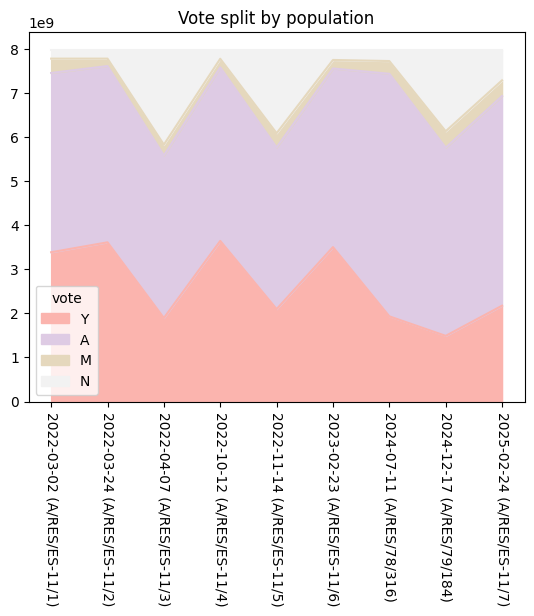

In [42]:
plt.figure(figsize=(12, 6))
ax = population_df.transpose().plot.area(colormap="Pastel1")
ax.tick_params(axis='x', labelrotation=270)
plt.title("Vote split by population")

In [43]:
GDP_df = create_summed_df('GDP 2023')  
GDP_df


,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
vote,,,,,,,,,
Y,7.653514e+13,7.720675e+13,6.629277e+13,7.694507e+13,6.843784e+13,7.692483e+13,6.684529e+13,6.484881e+13,4.174914e+13
A,2.487207e+13,2.446844e+13,1.569629e+13,2.443613e+13,1.464117e+13,2.476075e+13,3.469478e+13,1.822895e+13,3.097571e+13
M,6.501578e+11,3.821805e+11,4.629653e+11,6.583454e+11,5.246332e+11,3.332993e+11,4.761697e+11,5.574285e+11,6.629884e+11
N,2.093279e+12,2.093279e+12,2.169862e+13,2.111108e+12,2.054700e+13,2.131770e+12,2.134412e+12,2.051546e+13,3.076282e+13


Text(0.5, 1.0, 'Vote by GDP')

<Figure size 1200x600 with 0 Axes>

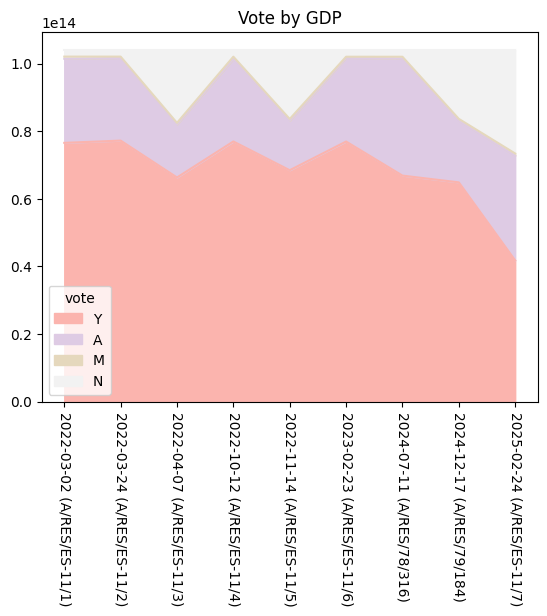

In [44]:
plt.figure(figsize=(12, 6))
ax = GDP_df.transpose().plot.area(colormap="Pastel1")
ax.tick_params(axis='x', labelrotation=270)
plt.title("Vote by GDP")

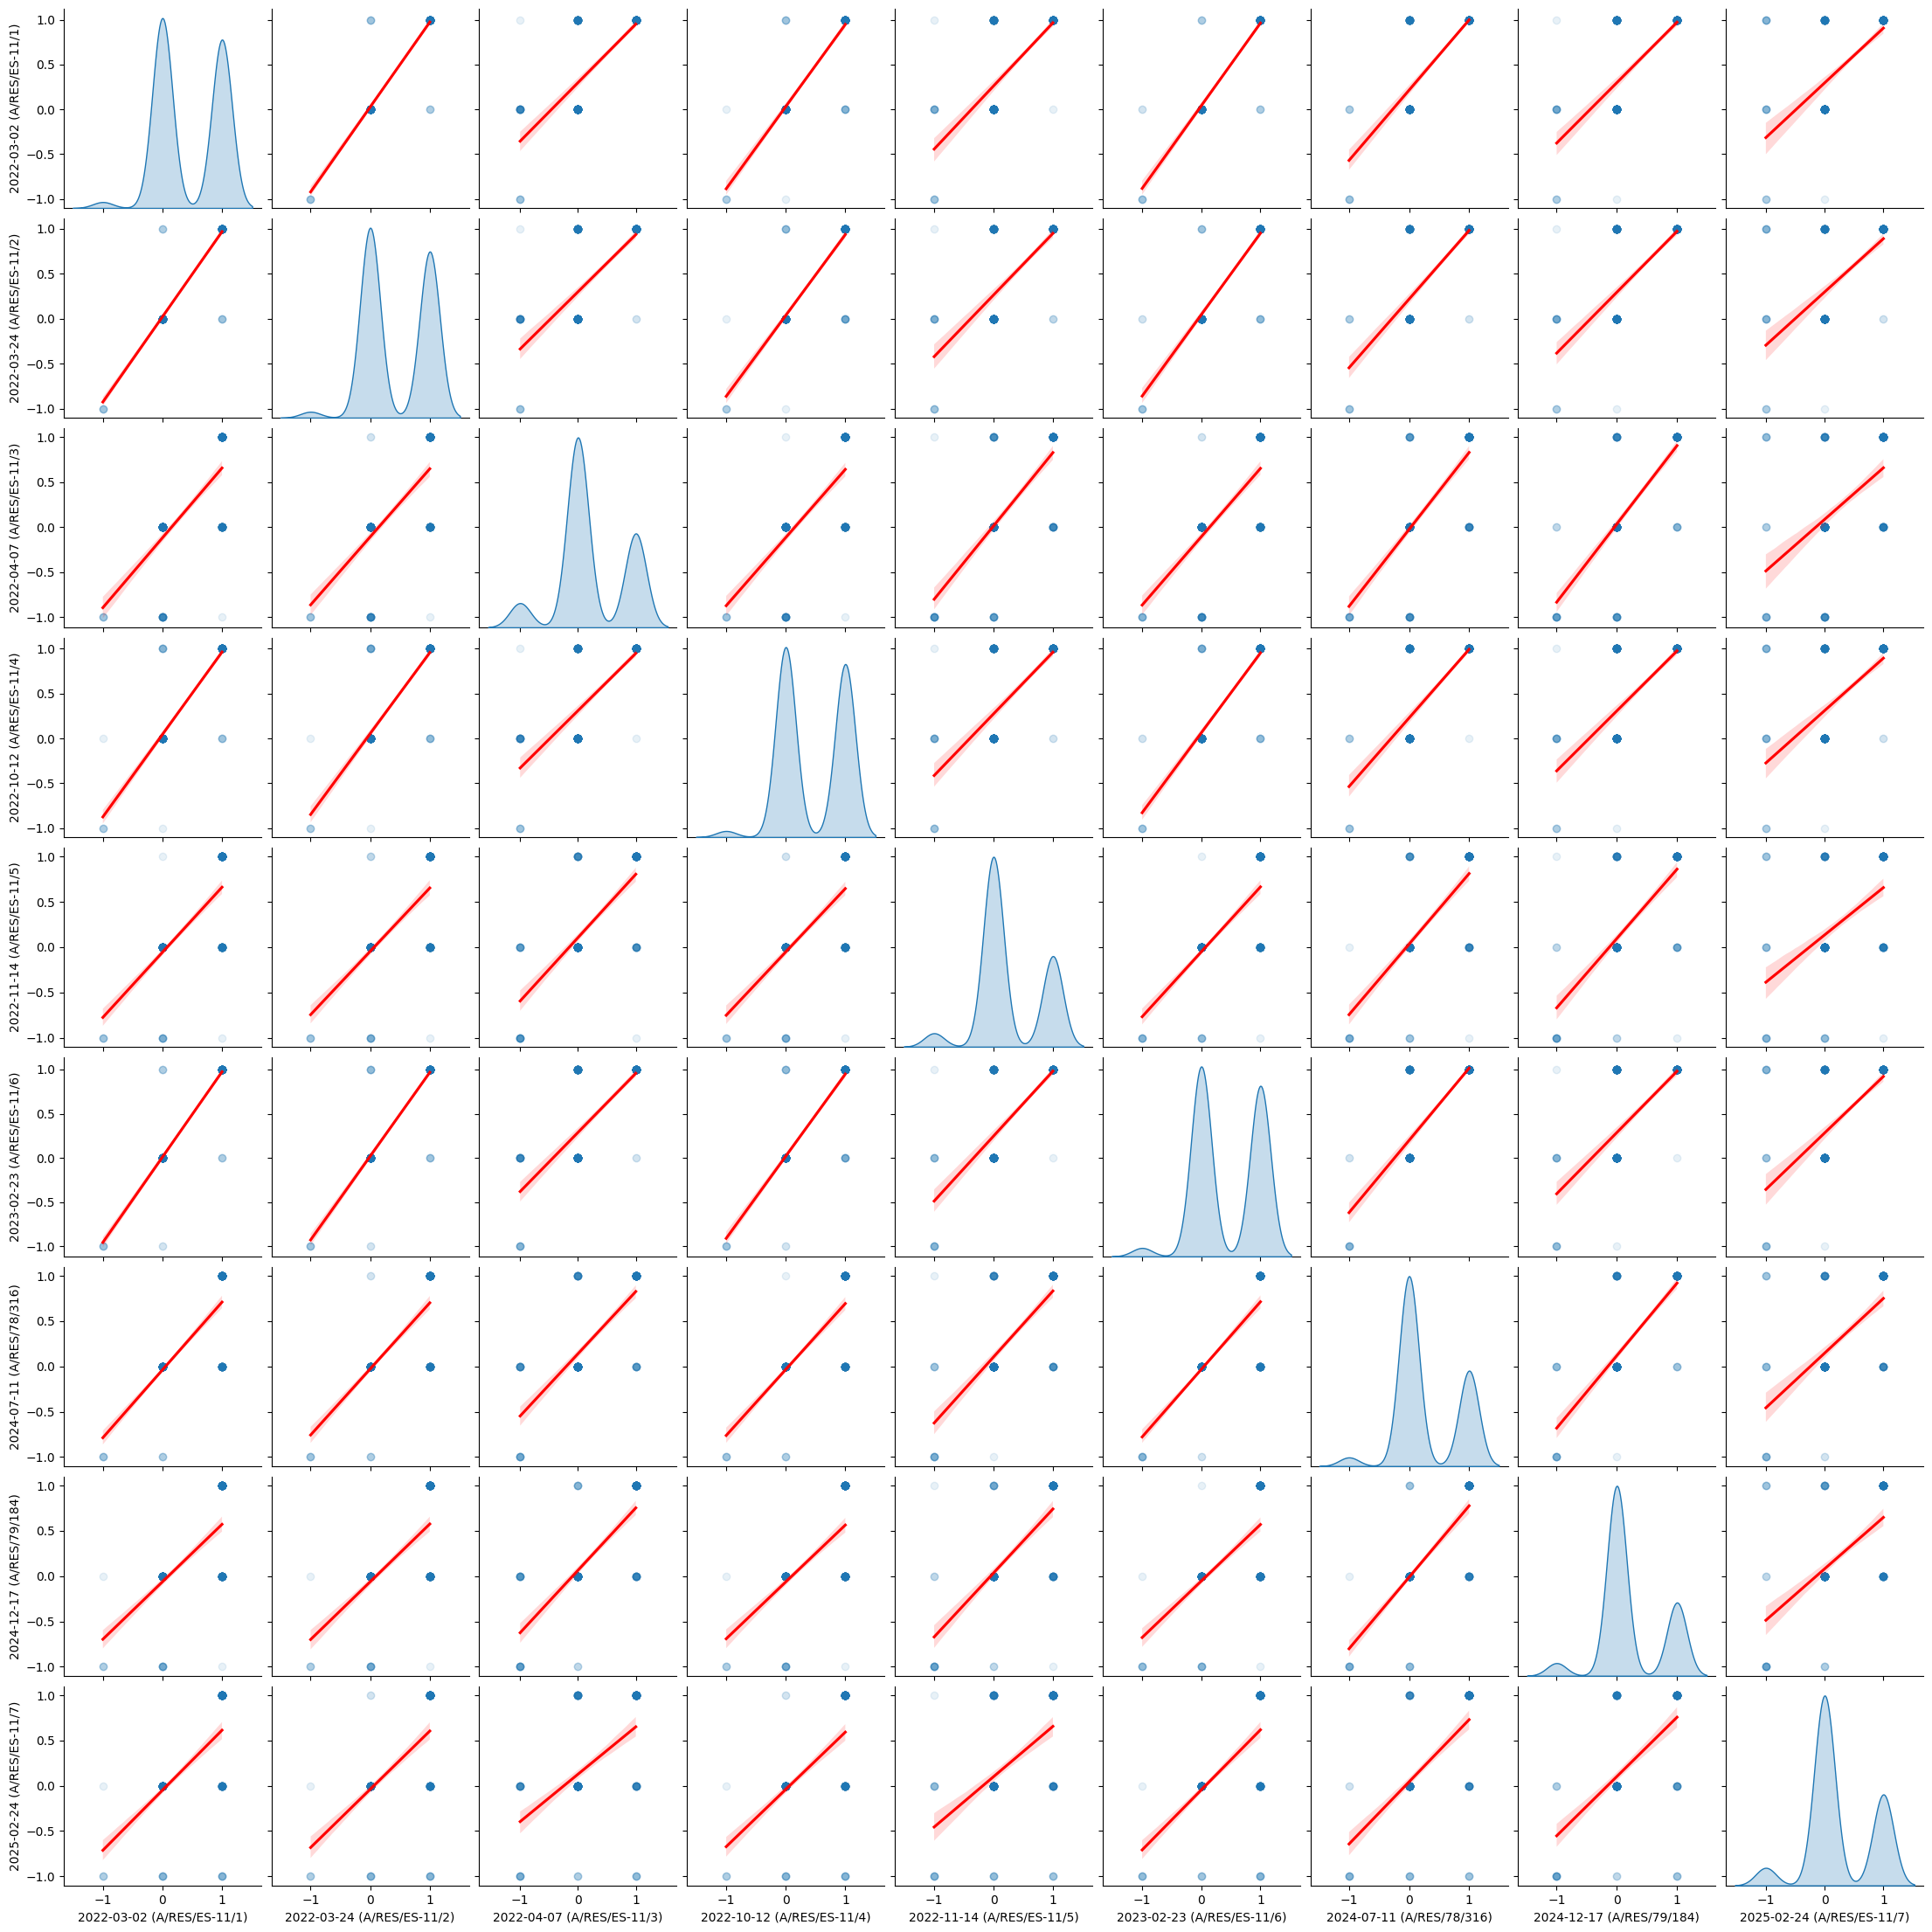

In [45]:



g = sns.pairplot(score_df[vote_headers], kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#g.map_lower(sns.kdeplot, levels=4, color=".2")

#g.axes[0,0].set_xlim((-1.1,1.1))
#g.axes[0,1].set_xlim((-0.1,1.1))
#g.axes[0,2].set_xlim((-0.1,1.1))
#g.axes[0,3].set_xlim((-0.1,1.1))
#g.axes[0,4].set_xlim((-0.1,1.1))

#g.axes[0,0].set_ylim((-1.1,1.1))
#g.axes[1,0].set_ylim((-0.1,1.1))
#g.axes[2,0].set_ylim((-0.1,1.1))
#g.axes[3,0].set_ylim((-0.1,1.1))
#g.axes[4,0].set_ylim((-0.1,1.1))


In [46]:
pg.cronbach_alpha(data=score_df[vote_headers])


(0.9600043388475142, array([0.953, 0.966]))

In [47]:
score_df[vote_headers].corr()

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
2022-03-02 (A/RES/ES-11/1),1.000000,0.947265,0.711958,0.918167,0.711601,0.942984,0.766025,0.653830,0.636302
2022-03-24 (A/RES/ES-11/2),0.947265,1.000000,0.693344,0.900646,0.691890,0.925696,0.746064,0.656913,0.616970
2022-04-07 (A/RES/ES-11/3),0.711958,0.693344,1.000000,0.695518,0.754845,0.712015,0.766357,0.774130,0.547446
2022-10-12 (A/RES/ES-11/4),0.918167,0.900646,0.695518,1.000000,0.693086,0.908898,0.746065,0.647752,0.607545
2022-11-14 (A/RES/ES-11/5),0.711601,0.691890,0.754845,0.693086,1.000000,0.725054,0.753040,0.734927,0.538507
2023-02-23 (A/RES/ES-11/6),0.942984,0.925696,0.712015,0.908898,0.725054,1.000000,0.780048,0.656867,0.650132
2024-07-11 (A/RES/78/316),0.766025,0.746064,0.766357,0.746065,0.753040,0.780048,1.000000,0.794328,0.643485
2024-12-17 (A/RES/79/184),0.653830,0.656913,0.774130,0.647752,0.734927,0.656867,0.794328,1.000000,0.609324
2025-02-24 (A/RES/ES-11/7),0.636302,0.616970,0.547446,0.607545,0.538507,0.650132,0.643485,0.609324,1.000000


# Bürgenstock


In [48]:
def map_Burgenstock_words(row):
    if row['Present'] == "Afwezig" and row['Signed'] == 'no':
        return 'Absent and did not sign'
    elif row['Present'] == "Afwezig" and row['Signed'] == 'yes':
        return 'Absent but signed'
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'no':
        return 'Present but did not sign'
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'yes':
        return 'Present and signed'
    else:
        return 'Other'

def map_Burgenstock_values(row):
    if row['Present'] == "Afwezig" and row['Signed'] == 'no':
        return 0.0
    elif row['Present'] == "Afwezig" and row['Signed'] == 'yes':
        return 1.0
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'no':
        return 0.5
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'yes':
        return 1.0
    else:
        return 0.0
    
def read_burgenstock(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df['Burgenstock_words'] = df.apply(lambda x: map_Burgenstock_words(x), axis=1)
    df['Burgenstock'] = df.apply(lambda x: map_Burgenstock_values(x), axis=1)
    
    print(df['Burgenstock_words'].value_counts())
    return df.set_index('country_code')['Burgenstock']


filename = "Burgenstock.xlsx"
#read_burgenstock(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_burgenstock, database, code_for_countries)
database

Burgenstock_words
Absent and did not sign     89
Present and signed          76
Present but did not sign    16
Absent but signed           13
Name: count, dtype: int64


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,M,Y,Y,Y,M,M,M,0.555556,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,N,A,A,A,A,A,A,-0.111111,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,Y,A,A,A,A,A,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


# Humanitarian aid

In [49]:
def map_binary_hum_aid(aid):
    if math.isnan(aid):
        return 0.0
    else:
        return aid

def read_binary_aid(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df['country_code'] = df.apply(lambda x: find_country_code(string.capwords(x.Country), code_for_countries), axis=1)
    df['Humanitarian aid'] = df.apply(lambda x: map_binary_hum_aid(x['Humanitarian aid']), axis=1)
    
    # Drop the 'Country' column as we do not need it. 
    df = df.drop(['Country'], axis=1)
    
    print(df)
    return df.set_index('country_code')


filename = "HumAidWiki.xlsx"
database = read_and_append_to_database(filename, read_binary_aid, database, code_for_countries)
database


     Humanitarian aid country_code
0                 0.0          AFG
1                 1.0          ALB
2                 0.0          DZA
3                 0.0          AND
4                 0.0          AGO
..                ...          ...
188               0.0          VEN
189               1.0          VNM
190               0.0          YEM
191               0.0          ZMB
192               0.0          ZWE

[193 rows x 2 columns]


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,M,Y,Y,Y,M,M,M,0.555556,0.0,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0,1.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,N,A,A,A,A,A,A,-0.111111,0.0,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,Y,A,A,A,A,A,0.111111,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [50]:
def read_aid_UNOCHA(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df.fillna(0, inplace=True)
    df['country_code'] = df.apply(lambda x: find_country_code(string.capwords(x.Country), code_for_countries), axis=1)
    df = df.drop(['Country'], axis=1).set_index('country_code')
    
    df = df.mean(axis=1).rename('aid UNOCHA')
    
    
    print(df)
    return df

def scale_col(database, col):
    database[col] = (database[col]-database[col].min())/(database[col].max()-database[col].min())
    return database

    
filename = "UNOCHAUkraine.xlsx"
database = read_and_append_to_database(filename, read_aid_UNOCHA, database, code_for_countries)
database['aid UNOCHA'] = database['aid UNOCHA']/database['GDP 2023']
database = scale_col(database, 'aid UNOCHA')
database['aid UNOCHA'].fillna(0, inplace=True)

database


Error! Name Jersey not in country_dict
country_code
DEU       4.976255e+07
CAN       1.572717e+07
GBR       4.235287e+07
CHE       1.116863e+07
NLD       1.996353e+07
USA       2.233333e+07
FRA       8.930033e+06
NOR       1.622103e+07
AUS       8.153352e+06
DNK       6.444707e+06
BEL       7.939335e+06
FIN       7.369282e+06
SWE       4.422820e+06
ITA       2.190580e+06
ESP       2.217194e+06
JPN       1.654321e+06
IRL       3.688965e+06
KOR       4.383333e+06
NZL       2.346173e+06
LUX       5.230337e+05
ISL       6.611683e+05
LTU       1.671237e+05
SVN       7.301933e+04
EST       1.007930e+05
Jersey    5.354733e+04
CYP       3.683833e+04
PHL       3.333333e+04
BGR       4.597967e+04
POL       6.693027e+05
Name: aid UNOCHA, dtype: float64


/tmp/ipykernel_8241/1624490476.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database['aid UNOCHA'].fillna(0, inplace=True)


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,Y,Y,M,M,M,0.555556,0.0,0.0,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,1.000000,1.0,1.0,0.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,A,A,A,A,-0.111111,0.0,0.0,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,1.000000,1.0,0.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,Y,A,A,A,A,A,0.111111,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0
YMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0


In [51]:
database['aid to Ukraine'] = (database['aid UNOCHA'] + database['Humanitarian aid'])/2
database

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA,aid to Ukraine
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,Y,M,M,M,0.555556,0.0,0.0,0.0,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,1.000000,1.0,1.0,0.0,0.5
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,A,A,A,-0.111111,0.0,0.0,0.0,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,1.000000,1.0,0.0,0.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,A,A,A,0.111111,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
YMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN


# Arms supplies

In [52]:
def read_arms_Ukraine(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(x.Supplier, code_for_countries), axis=1)
    
    df = df['country_code'].value_counts(sort=False).rename('arms supplied count')
    
    print(df)
    return df


filename = "SIPRIUkraine20222025.xlsx"
read_arms_Ukraine(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_arms_Ukraine, database, code_for_countries)
#database['arms supplied'] = database['arms supplied']/database['GDP 2023']
database['arms supplied count'].fillna(0, inplace=True)
database = scale_diminishing(database, 'arms supplied count', 'arms supplied')
database['arms supplied'].fillna(0, inplace=True)

database

    Recipient             Supplier             Designation  \
0     Ukraine              Belgium           M-109A1 155mm   
1     Ukraine               Poland             Leopard-2A4   
2     Ukraine              Czechia             BM-21 122mm   
3     Ukraine        United States             Penguin UAV   
4     Ukraine              Czechia                  T-72M1   
..        ...                  ...                     ...   
405   Ukraine  unknown supplier(s)  vehicle engine 301-400   
406   Ukraine               Jordan          APC-79 Fighter   
407   Ukraine        United States                     MMR   
408   Ukraine       United Kingdom             LMM Martlet   
409   Ukraine       United Kingdom          Starstreak FIX   

                    Description    Weapon Category  Order Year  \
0            self-propelled gun          Artillery        2022   
1                          tank  Armoured vehicles        2022   
2      multiple rocket launcher          Artillery       

/tmp/ipykernel_8241/3472181067.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database['arms supplied count'].fillna(0, inplace=True)
/tmp/ipykernel_8241/3472181067.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA,aid to Ukraine,arms supplied count,arms supplied
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,M,M,M,0.555556,0.0,0.0,0.0,0.0,0.0,0.000000
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,1.000000,1.0,1.0,0.0,0.5,0.0,0.000000
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,A,-0.111111,0.0,0.0,0.0,0.0,0.0,0.000000
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,A,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,0.0,0.000000
YMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,0.0,0.000000
YUG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,0.0,0.000000


In [53]:
for it in database['arms supplied']:
    print(it)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9122085048010974
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9948617689138274
0.0
0.0
0.0
0.0
0.33333333333333337
0.0
0.0
0.0
0.5555555555555556
0.0
0.0
0.0
0.0
0.0
0.992292653370741
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9414723365340649
0.0
0.0
0.9999405968079365
0.868312757201646
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9414723365340649
0.0
0.0
0.0
0.868312757201646
0.999866342817857
0.0
0.0
0.0
0.9999997965151146
0.0
0.5555555555555556
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9948617689138274
0.0
0.0
0.5555555555555556
0.0
0.0
0.0
0.0
0.0
0.0
0.9414723365340649
0.0
0.0
0.0
0.0
0.0
0.9122085048010974
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.33333333333333337
0.33333333333333337
0.0
0.0
0.0
0.0
0.0
0.9977163417394789
0.0
0.0
0.0
0.0
0.0
0.7037037037037037
0.9977163417394789
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9999823990542034
0.868312757201646
0.5555555555555556
0.8024691358024691
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


[Text(0.5, 0, 'Frequency of arms supplied'),
 Text(0, 0.5, 'Number of countries'),
 Text(0.5, 1.0, 'Distribution of arms supplies')]

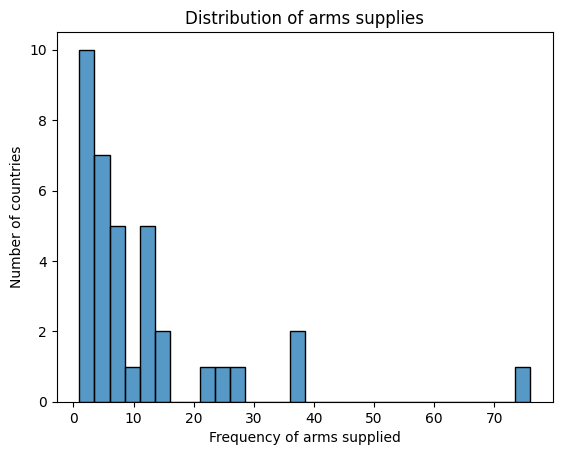

In [54]:
arms_df = database[database['arms supplied count']>0.0]
#print(arms_df)
#arms_df = np.log2(arms_df['arms supplied'])

ax = sns.histplot(data=arms_df, x="arms supplied count", bins=30)
ax.set(xlabel='Frequency of arms supplied',
       ylabel='Number of countries',
       title='Distribution of arms supplies')



In [55]:
database[database['arms supplied']>0.0]

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA,aid to Ukraine,arms supplied count,arms supplied
country_code,,,,,,,,,,,,,,,,,,,,,
AUS,25685412.0,26638544.0,1.556736e+12,1.728057e+12,21.8,2.7,1.7,3.1,1.6,1.8,...,Y,Y,Y,1.000000,1.0,1.0,0.139199,0.569599,6.0,0.912209
BEL,11586195.0,11822592.0,5.984940e+11,6.447828e+11,31.0,2.6,4.4,4.1,4.6,2.1,...,Y,Y,Y,1.000000,1.0,1.0,0.366950,0.683475,13.0,0.994862
BIH,3270943.0,3210847.0,2.367271e+10,2.751478e+10,72.9,5.0,8.7,6.6,6.4,4.1,...,Y,Y,Y,1.000000,1.0,1.0,0.000000,0.500000,1.0,0.333333
BGR,6877743.0,6430370.0,8.441795e+10,1.024077e+11,51.6,4.3,5.3,4.2,5.2,3.8,...,Y,Y,Y,1.000000,1.0,1.0,0.011177,0.505589,2.0,0.555556
CAN,38239864.0,40097761.0,2.007472e+12,2.142471e+12,21.7,2.8,2.5,2.2,2.0,2.3,...,Y,Y,Y,1.000000,1.0,1.0,0.217838,0.608919,12.0,0.992293
HRV,3878981.0,3853200.0,6.900680e+10,8.439380e+10,49.8,2.6,4.4,4.9,5.7,2.8,...,Y,Y,Y,1.000000,1.0,1.0,0.000000,0.500000,7.0,0.941472
CZE,10505772.0,10873689.0,2.909727e+11,3.432079e+11,39.3,2.6,5.3,4.6,4.2,2.0,...,Y,Y,Y,1.000000,1.0,1.0,0.000000,0.500000,24.0,0.999941
DNK,5856733.0,5946952.0,4.083782e+11,4.070919e+11,18.8,1.7,1.4,3.7,1.7,1.2,...,Y,Y,Y,1.000000,1.0,1.0,0.472441,0.736220,5.0,0.868313
EST,1330932.0,1366188.0,3.720456e+10,4.129125e+10,39.5,2.3,5.9,7.4,3.2,2.6,...,Y,Y,Y,1.000000,1.0,1.0,0.070913,0.535456,7.0,0.941472


# Compare variables

In [56]:
compare_list = ['UNGA score', 'Burgenstock', 'Humanitarian aid', 'arms supplied']


(-0.1, 1.1)

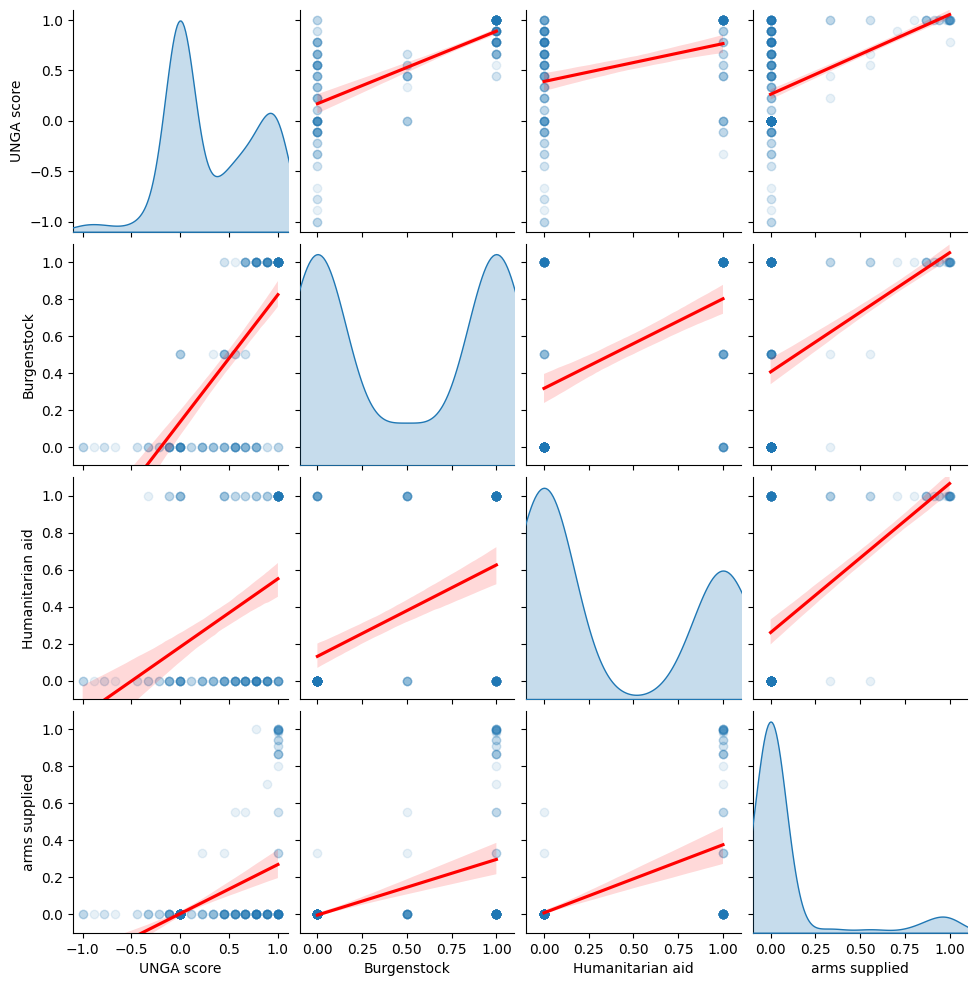

In [57]:

g = sns.pairplot(database[compare_list], kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#g.map_lower(sns.kdeplot, levels=4, color=".2")

g.axes[0,0].set_xlim((-1.1,1.1))
g.axes[0,1].set_xlim((-0.1,1.1)) #Burgenstock
g.axes[0,2].set_xlim((-0.1,1.1)) #Hum aid
g.axes[0,3].set_xlim((-0.1,1.1))

g.axes[0,0].set_ylim((-1.1,1.1))
g.axes[1,0].set_ylim((-0.1,1.1))
g.axes[2,0].set_ylim((-0.1,1.1))
g.axes[3,0].set_ylim((-0.1,1.1))


In [58]:
pg.cronbach_alpha(data=database[compare_list])


(0.8077085734932841, array([0.77 , 0.841]))

In [59]:
database[compare_list].corr()

,UNGA score,Burgenstock,Humanitarian aid,arms supplied
UNGA score,1.000000,0.703038,0.372169,0.458253
Burgenstock,0.703038,1.000000,0.489519,0.440287
Humanitarian aid,0.372169,0.489519,1.000000,0.544952
arms supplied,0.458253,0.440287,0.544952,1.000000


In [60]:
print(database[compare_list].corr().to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
 & UNGA score & Burgenstock & Humanitarian aid & arms supplied \\
\midrule
UNGA score & 1.00 & 0.70 & 0.37 & 0.46 \\
Burgenstock & 0.70 & 1.00 & 0.49 & 0.44 \\
Humanitarian aid & 0.37 & 0.49 & 1.00 & 0.54 \\
arms supplied & 0.46 & 0.44 & 0.54 & 1.00 \\
\bottomrule
\end{tabular}



# Save database

In [61]:
database.to_csv('database.csv')

# Combined position variable

In [62]:
database['state position'] = database[compare_list].sum(axis=1)
database[compare_list]

,UNGA score,Burgenstock,Humanitarian aid,arms supplied
country_code,,,,
AFG,0.555556,0.0,0.0,0.000000
ALB,1.000000,1.0,1.0,0.000000
DZA,-0.111111,0.0,0.0,0.000000
AND,1.000000,1.0,0.0,0.000000
AGO,0.111111,0.0,0.0,0.000000
...,...,...,...,...
SUN,0.000000,NaN,NaN,0.000000
YMD,0.000000,NaN,NaN,0.000000
YUG,0.000000,NaN,NaN,0.000000


In [63]:
database['state position']

country_code
AFG                    0.555556
ALB                    3.000000
DZA                   -0.111111
AND                    2.000000
AGO                    0.111111
                         ...   
SUN                    0.000000
YMD                    0.000000
YUG                    0.000000
Jersey                 0.000000
unknown supplier(s)    0.802469
Name: state position, Length: 307, dtype: float64

[Text(0.5, 0, 'State position'),
 Text(0, 0.5, 'Number of countries'),
 Text(0.5, 1.0, 'State positions')]

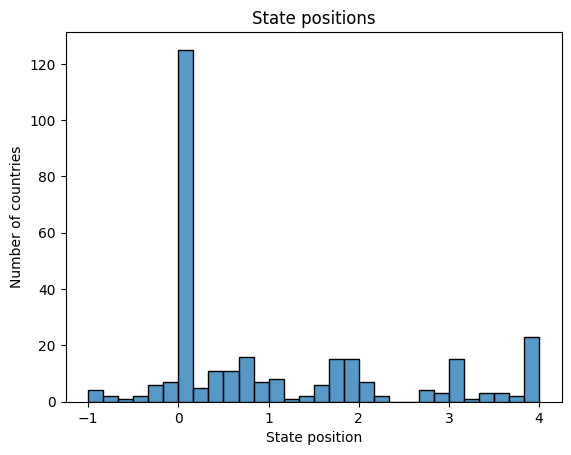

In [64]:
ax = sns.histplot(data=database, x='state position', bins=30)
ax.set(xlabel='State position',
       ylabel='Number of countries',
       title='State positions')

## Print dependent variables

In [65]:
database_deps = database[database.apply(lambda x: not math.isnan(x['Burgenstock']), axis=1)]
database_deps = database_deps[['Burgenstock', 'Humanitarian aid', 'arms supplied count', 'arms supplied', 'state position']]
database_deps

,Burgenstock,Humanitarian aid,arms supplied count,arms supplied,state position
country_code,,,,,
AFG,0.0,0.0,0.0,0.0,0.555556
ALB,1.0,1.0,0.0,0.0,3.000000
DZA,0.0,0.0,0.0,0.0,-0.111111
AND,1.0,0.0,0.0,0.0,2.000000
AGO,0.0,0.0,0.0,0.0,0.111111
...,...,...,...,...,...
VEN,0.0,0.0,0.0,0.0,0.000000
VNM,0.0,1.0,0.0,0.0,0.888889
YEM,0.0,0.0,0.0,0.0,0.444444


In [66]:
i = 0 
step_size = 33

def int_format(i):
    return str(int(i))

def two_deci_format(i):
    return "{:.2f}".format(i)

formatters = [int_format, int_format, int_format, two_deci_format, two_deci_format]



while i < len(database_deps):
    if i + step_size >= len(database_deps):
        end_line = len(database_deps)
    else: 
        end_line = i + step_size
    print(database_deps.iloc[np.arange(i, end_line)].to_latex(formatters = formatters))
    i += step_size

\begin{tabular}{lrrrrr}
\toprule
 & Burgenstock & Humanitarian aid & arms supplied count & arms supplied & state position \\
country_code &  &  &  &  &  \\
\midrule
AFG & 0 & 0 & 0 & 0.00 & 0.56 \\
ALB & 1 & 1 & 0 & 0.00 & 3.00 \\
DZA & 0 & 0 & 0 & 0.00 & -0.11 \\
AND & 1 & 0 & 0 & 0.00 & 2.00 \\
AGO & 0 & 0 & 0 & 0.00 & 0.11 \\
ATG & 1 & 0 & 0 & 0.00 & 1.89 \\
ARG & 1 & 1 & 0 & 0.00 & 2.89 \\
ARM & 0 & 1 & 0 & 0.00 & 1.50 \\
AUS & 1 & 1 & 6 & 0.91 & 3.91 \\
AUT & 1 & 1 & 0 & 0.00 & 3.00 \\
AZE & 0 & 1 & 0 & 0.00 & 1.00 \\
BHS & 0 & 0 & 0 & 0.00 & 0.78 \\
BHR & 0 & 1 & 0 & 0.00 & 1.94 \\
BGD & 0 & 0 & 0 & 0.00 & 0.22 \\
BRB & 1 & 0 & 0 & 0.00 & 1.78 \\
BLR & 0 & 0 & 0 & 0.00 & -1.00 \\
BEL & 1 & 1 & 13 & 0.99 & 3.99 \\
BLZ & 0 & 0 & 0 & 0.00 & 0.78 \\
BEN & 1 & 0 & 0 & 0.00 & 1.67 \\
BTN & 0 & 0 & 0 & 0.00 & 0.67 \\
BOL & 0 & 0 & 0 & 0.00 & -0.11 \\
BIH & 1 & 1 & 1 & 0.33 & 3.33 \\
BWA & 1 & 0 & 0 & 0.00 & 1.44 \\
BRA & 0 & 1 & 0 & 0.00 & 1.94 \\
BRN & 0 & 0 & 0 & 0.00 & 0.33 \\
BGR & 

# Regression analysis

In [67]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import copy


In [68]:
#indep_variables = ['Former Soviet Union', 'Democracy Index', 'EU', 'NAVO', 'SCO', 'Import from Russia', 'Import from Ukraine'] 'total voting similarity'
indep_variables = ['Former Soviet Union', 'Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'EU', 'NAVO', 'RUS voting similarity', 'West voting similarity']

dep_var = ['state position']
spaceless_dep_var = ['stateposition']


In [69]:
database['FSI Total'] = database['FSI Total (2021)']

In [70]:
def filter_out_spaces(indep_variables, filtered_database, dep_var):
    rename_dict = {}
    spaceless_indep_vars = []
    for col in indep_variables:
        rename_dict[col] = col.replace(" ", "")
        spaceless_indep_vars.append(col.replace(" ", ""))
    rename_dict[dep_var[0]] = dep_var[0].replace(" ", "")
    #print(rename_dict)
    #print(spaceless_indep_vars)
    filtered_database_spaceless = filtered_database.rename(columns = rename_dict)
    return spaceless_indep_vars, filtered_database_spaceless

#spaceless_indep_vars, filtered_database_spaceless = filter_out_spaces(indep_variables, filtered_database, dep_var)
#display(filtered_database_spaceless)

In [71]:
def print_results_in_latex(results):
    for table in results.summary().tables:
        print(table.as_latex_tabular())

In [72]:
def calculate_api_string(spaceless_indep_vars, dep_var):
    return dep_var[0].replace(" ", "") + " ~ " + " + ".join(spaceless_indep_vars)

In [73]:
def prep_database(database, indep_variables, dep_var):
    filtered_database = database[indep_variables + dep_var].dropna().drop(['UKR', 'RUS'],axis=0, errors='ignore')
    return filter_out_spaces(indep_variables, filtered_database, dep_var)
    

In [74]:
def run_model_for_vars(database, indep_vars, dep_var, print_latex=True, debug=False):
    print(f"Running model with dependent variable {dep_var} and independent variables {indep_vars}")
    
    spaceless_indep_vars, filtered_database_spaceless = prep_database(database, indep_vars, dep_var)
    
    if debug:
        display(filtered_database_spaceless)
    
    df_z = filtered_database_spaceless.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
    
    if debug: 
        display(df_z)
    
    api_string = calculate_api_string(spaceless_indep_vars, dep_var)
    
    #print(api_string)
    
    results = smf.ols(api_string,
                  data=df_z).fit()
    display(results.summary())
    
    if print_latex:
        print_results_in_latex(results)
    
    return results

In [75]:
results = run_model_for_vars(database, indep_variables, dep_var)

Running model with dependent variable ['state position'] and independent variables ['Former Soviet Union', 'Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'EU', 'NAVO', 'RUS voting similarity', 'West voting similarity']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          stateposition   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     37.49
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           3.35e-39
Time:                        14:21:44   Log-Likelihood:                -72.677
No. Observations:                 138   AIC:                             179.4
Df Residuals:                     121   BIC:                             229.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -2.203e-16      0.037  -5.91e-15      1.000      -0.074       0.074
FormerSovietUnion                 0.0267      0.069      0.389      0.698      -0.109       0.163
Personnelarmedforces2020          0.0830      0.047      1.770      0.079      -0.010       0.176
BordersChina                     -0.0339      0.047     -0.727      0.469      -0.126       0.058
ArmsreceivedfromRussia            0.0122      0.059      0.207      0.836      -0.104       0.129
ConfirmedRussianPMCoperations    -0.0904      0.041     -2.220      0.028      -0.171      -0.010
FSIPolitical                      0.0982      0.135      0.727      0.469      -0.169       0.366
ImportfromRussia                 -0.0669      0.066     -1.020      0.310      -0.197       0.063
ImportfromWest                   -0.0470      0.070     -0.672      0.503      -0.186       0.092
Fertilizertrade                  -0.0036      0.046     -0.078      0.938      -0.095       0.088
Westernaid                       -0.0207      0.051     -0.404      0.687      -0.122       0.081
FSIEconomic                      -0.2307      0.088     -2.622      0.010      -0.405      -0.057
DemocracyIndex                   -0.2523      0.088     -2.879      0.005      -0.426      -0.079
EU                               -0.0468      0.064     -0.732      0.465      -0.173       0.080
NAVO                              0.1497      0.067      2.224      0.028       0.016       0.283
RUSvotingsimilarity               0.1674      0.051      3.257      0.001       0.066       0.269
Westvotingsimilarity             -0.4601      0.089     -5.179      0.000      -0.636      -0.284
==============================================================================
Omnibus:                        2.855   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.627
Skew:                           0.257   Prob(JB):                        0.269
Kurtosis:                       2.561   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &  stateposition   & \textbf{  R-squared:         } &    0.832  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.810  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    37.49  \\
\textbf{Date:}             & Mon, 23 Jun 2025 & \textbf{  Prob (F-statistic):} & 3.35e-39  \\
\textbf{Time:}             &     14:21:45     & \textbf{  Log-Likelihood:    } &  -72.677  \\
\textbf{No. Observations:} &         138      & \textbf{  AIC:               } &    179.4  \\
\textbf{Df Residuals:}     &         121      & \textbf{  BIC:               } &    229.1  \\
\textbf{Df Model:}         &          16      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

In [76]:
#filtered_database

In [77]:
# Remove Russia and Ukraine
#filtered_database = filtered_database.drop(['UKR', 'RUS'],axis=0, errors='ignore')
#filtered_database

In [78]:
#display(filtered_database['Personnel armed forces 2020'].to_string())

In [79]:
#model = LinearRegression().fit(filtered_database[indep_variables], filtered_database[dep_var])

In [80]:
#r_sq = model.score(filtered_database[indep_variables], filtered_database[dep_var])
#print(f"coefficient of determination: {r_sq}")

#print(f"intercept: {model.intercept_}")

#print(f"coefficients: {model.coef_}")


In [81]:
# https://realpython.com/linear-regression-in-python/

#x = np.array(filtered_database[indep_variables])
#x = sm.add_constant(x)
#x

In [82]:
#y = np.array(filtered_database[dep_var])

In [83]:
#model = sm.OLS(y, x)

In [84]:
#results = model.fit()
#print(results.summary())

stateposition ~ FormerSovietUnion + Personnelarmedforces2020 + BordersChina + ArmsreceivedfromRussia + ConfirmedRussianPMCoperations + FSIPolitical + ImportfromRussia + ImportfromWest + Fertilizertrade + Westernaid + FSIEconomic + DemocracyIndex + EU + NAVO + RUSvotingsimilarity + Westvotingsimilarity


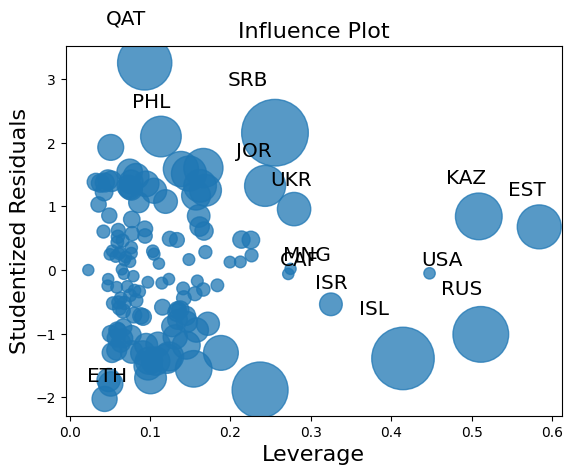

In [85]:
def plot_influence_plot(database, indep_variables, dep_var):
    spaceless_indep_vars, filtered_database_spaceless = filter_out_spaces(indep_variables, database, dep_var)

    api_string = dep_var[0].replace(" ", "") + " ~ " + " + ".join(spaceless_indep_vars)
    print(api_string)

    results = smf.ols(api_string,
                      data=filtered_database_spaceless).fit()
    sm.graphics.influence_plot(results)
    plt.show()

filtered_database = database[indep_variables + dep_var].dropna()
plot_influence_plot(filtered_database, indep_variables, dep_var)


- Residuals (above) should be inside of -2 and +2 for about 95% of the cases (p. 345)
- Durbin-Watson should be close to 2.0 (see p. 311)
- Cook's distance (below) should not be greater than 1 (p. 348)

In [86]:
#create instance of influence
influence = results.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

display(cooks)

display(influence.summary_frame())

(array([3.02890007e-03, 4.96042519e-03, 1.14661956e-02, 4.86425238e-03,
        1.34496623e-06, 4.62353807e-03, 1.12442405e-03, 7.94329171e-03,
        6.93929512e-02, 6.50197491e-04, 4.51509502e-03, 6.24531565e-03,
        2.83789913e-02, 5.57417202e-05, 1.16868036e-04, 5.23652589e-04,
        1.07444817e-03, 1.16773516e-02, 2.15355649e-02, 9.97149663e-04,
        3.75173754e-03, 6.27458224e-04, 7.95814283e-05, 6.01734423e-03,
        5.69251653e-04, 1.50732948e-03, 4.88375609e-03, 4.96303777e-06,
        4.15460138e-03, 6.32719023e-03, 2.25138780e-03, 1.80950234e-04,
        2.18914420e-03, 1.08281645e-03, 2.29760236e-03, 8.57435906e-04,
        4.86658252e-03, 7.73209643e-04, 8.95719069e-03, 4.02068219e-02,
        1.06112628e-02, 1.18052397e-02, 5.93913563e-04, 1.49720248e-03,
        3.20164544e-03, 6.32648014e-03, 1.04105486e-03, 8.63194164e-04,
        1.25075881e-03, 5.38402853e-04, 4.15830144e-03, 2.20637587e-03,
        1.51724351e-02, 1.28154909e-02, 8.72946660e-02, 2.097000

,dfb_Intercept,dfb_FormerSovietUnion,dfb_Personnelarmedforces2020,dfb_BordersChina,dfb_ArmsreceivedfromRussia,dfb_ConfirmedRussianPMCoperations,dfb_FSIPolitical,dfb_ImportfromRussia,dfb_ImportfromWest,dfb_Fertilizertrade,...,dfb_EU,dfb_NAVO,dfb_RUSvotingsimilarity,dfb_Westvotingsimilarity,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
country_code,,,,,,,,,,,,,,,,,,,,,
ALB,-0.051440,0.015780,0.002153,-0.016275,0.007548,0.004006,0.015492,0.000385,-0.003369,0.013731,...,0.154769,-0.081373,-0.016730,0.113804,0.003029,-0.561911,0.140213,-0.226917,-0.560316,-0.226273
AGO,-0.097483,-0.018799,-0.038931,0.050643,-0.128042,0.046418,0.019754,0.026608,-0.074371,0.052381,...,0.021435,0.009738,-0.026376,0.006564,0.004960,-1.106625,0.064424,-0.290392,-1.107662,-0.290664
ARG,0.167970,-0.000335,0.171123,-0.124715,0.100201,-0.073058,-0.284266,-0.039581,-0.115177,-0.006999,...,-0.065043,-0.039577,-0.135470,-0.018141,0.011466,1.900998,0.051179,0.441503,1.922046,0.446392
ARM,0.052469,0.070587,0.029653,-0.129334,0.089662,-0.075220,-0.048361,0.092719,-0.014596,-0.088810,...,-0.012302,-0.001202,-0.052362,0.010287,0.004864,0.547214,0.216395,0.287563,0.545624,0.286727
AUS,-0.001111,0.000467,-0.000276,0.000201,-0.000238,-0.000065,0.000139,0.000047,0.001586,-0.000392,...,0.000846,0.002244,-0.002434,0.002195,0.000001,-0.012203,0.133108,-0.004782,-0.012152,-0.004762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
URY,-0.008826,0.001531,-0.001095,0.003505,0.000566,0.001586,0.008777,0.000025,0.006162,-0.005897,...,0.001178,-0.000282,0.009522,-0.008254,0.000044,-0.100456,0.068952,-0.027338,-0.100044,-0.027226
UZB,0.056346,0.172352,0.019602,-0.094216,0.023410,-0.049907,-0.052994,-0.024377,-0.013939,-0.137063,...,0.013092,0.033982,-0.042772,0.052674,0.004537,0.602764,0.175112,0.277720,0.601171,0.276987
VNM,0.003024,0.001241,0.000116,0.009916,0.002466,-0.000985,-0.000690,-0.006296,0.000121,0.001321,...,-0.000377,0.000423,-0.000898,0.000154,0.000012,0.032671,0.160908,0.014307,0.032536,0.014248


[-0.5619113  -1.10662529  1.90099821  0.54721413 -0.01220284 -0.67854201
 -0.29998746  1.28627748 -1.88626286  0.41817522  1.37940391 -1.28883069
  1.68037016 -0.13672232  0.12559184  0.31963222 -0.30899187 -1.12930262
  1.41651665 -0.54307314 -0.88781595 -0.21750454 -0.05890861  1.36583309
 -0.27018762  0.60244163 -0.94803931 -0.03451071  1.41558107  1.06583201
  0.41582439  0.24163438 -0.70910463 -0.50080714  0.57097313  0.35199837
  1.31777463 -0.39648541 -1.71481134  0.68991356 -1.9887656   1.5659605
 -0.31896241  0.48939223 -0.7424073   1.39622678  0.21968661 -0.46387808
  0.64994579 -0.30544212  1.23586704  0.84923598 -1.35108167 -1.41116825
 -1.42714487  0.33446244  1.61275366 -1.28093659 -0.71540071 -0.40658731
  0.2059852  -0.54952173 -1.05275415  1.26123848  0.92982291  1.06220239
  0.41270665 -0.87700913 -1.04332913  0.79647154 -0.63152842  1.20002871
  0.65990679 -1.51499077 -0.27898575  1.28640019 -0.74917689 -0.10059038
 -0.64951688  0.0958525  -0.96878222 -1.18492103 -0.

<AxesSubplot:ylabel='Count'>

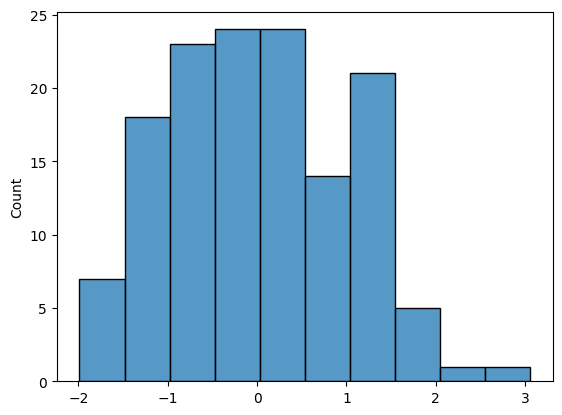

In [87]:
#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#display standardized residuals
print(standardized_residuals)

sns.histplot(standardized_residuals)

In [88]:
#g = sns.pairplot(filtered_database_spaceless[spaceless_indep_vars], kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})


In [89]:
# Code from: https://www.statology.org/how-to-calculate-vif-in-python/

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(database, indep_vars, dep_var):
    spaceless_indep_vars, filtered_database_spaceless = prep_database(database, indep_vars, dep_var)
    api_string = calculate_api_string(spaceless_indep_vars, dep_var)
    
    #find design matrix for linear regression model using 'rating' as response variable 
    y, X = dmatrices(api_string, data=filtered_database_spaceless, return_type='dataframe')

    #calculate VIF for each explanatory variable
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['variable'] = X.columns

    #view VIF for each explanatory variable 
    display(vif)

calculate_VIF(database, indep_variables, dep_var)

,VIF,variable
0,122.129547,Intercept
1,3.396067,FormerSovietUnion
2,1.585286,Personnelarmedforces2020
3,1.569376,BordersChina
4,2.495437,ArmsreceivedfromRussia
5,1.196096,ConfirmedRussianPMCoperations
6,13.155465,FSIPolitical
7,3.103989,ImportfromRussia
8,3.532025,ImportfromWest
9,1.540553,Fertilizertrade


In [90]:
def print_correlations(database, indep_vars, dep_var):
    spaceless_indep_vars, filtered_database_spaceless = prep_database(database, indep_vars, dep_var)
    display(filtered_database_spaceless.corr())
    
print_correlations(database, indep_variables, dep_var)

,FormerSovietUnion,Personnelarmedforces2020,BordersChina,ArmsreceivedfromRussia,ConfirmedRussianPMCoperations,FSIPolitical,ImportfromRussia,ImportfromWest,Fertilizertrade,Westernaid,FSIEconomic,DemocracyIndex,EU,NAVO,RUSvotingsimilarity,Westvotingsimilarity,stateposition
FormerSovietUnion,1.000000,-0.038237,0.211333,0.262906,0.126799,0.032064,0.760486,-0.044800,0.513741,-0.029130,-0.033061,0.150379,0.042279,0.013247,-0.120272,-0.090913,-0.047405
Personnelarmedforces2020,-0.038237,1.000000,0.207579,0.399765,0.021828,0.230430,0.049508,-0.193678,-0.051671,-0.201515,-0.066559,0.209913,-0.058148,-0.056307,-0.113488,0.182676,-0.035737
BordersChina,0.211333,0.207579,1.000000,0.462394,0.039375,0.196835,0.417549,-0.329243,0.003148,-0.029533,0.062759,0.266761,-0.137853,-0.153574,-0.263764,0.200595,-0.236261
ArmsreceivedfromRussia,0.262906,0.399765,0.462394,1.000000,0.243656,0.515287,0.413672,-0.391045,-0.013421,0.004839,0.238161,0.567574,-0.278518,-0.312281,-0.472227,0.384520,-0.431886
ConfirmedRussianPMCoperations,0.126799,0.021828,0.039375,0.243656,1.000000,0.185219,0.135809,-0.160312,0.059788,0.279066,0.185981,0.203002,-0.130271,-0.145127,-0.144273,0.144811,-0.273478
FSIPolitical,0.032064,0.230430,0.196835,0.515287,0.185219,1.000000,0.068267,-0.658147,-0.075695,0.423044,0.815201,0.862866,-0.598482,-0.609069,-0.514758,0.757639,-0.784733
ImportfromRussia,0.760486,0.049508,0.417549,0.413672,0.135809,0.068267,1.000000,-0.109701,0.288225,-0.056837,-0.035926,0.186029,0.003667,0.006012,-0.186676,-0.021907,-0.110992
ImportfromWest,-0.044800,-0.193678,-0.329243,-0.391045,-0.160312,-0.658147,-0.109701,1.000000,0.135935,-0.318740,-0.487383,-0.551089,0.705855,0.675125,0.433912,-0.762724,0.648484
Fertilizertrade,0.513741,-0.051671,0.003148,-0.013421,0.059788,-0.075695,0.288225,0.135935,1.000000,-0.036466,0.007273,-0.045462,0.136119,0.106768,-0.031957,-0.134104,0.043547
Westernaid,-0.029130,-0.201515,-0.029533,0.004839,0.279066,0.423044,-0.056837,-0.318740,-0.036466,1.000000,0.536688,0.358897,-0.270744,-0.260075,-0.043229,0.291486,-0.383848


In [91]:
# standardizing dataframe
#df_z = filtered_database_spaceless.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

In [92]:
#results = smf.ols(api_string,
#                  data=df_z).fit()
#results.summary()

## Model per dependent variable component

In [93]:
dep_vars = ['UNGA score', 'Burgenstock', 'Humanitarian aid', 'arms supplied']

   
    
for dep_va in dep_vars:
    print(f"Dependent variable: {dep_va}")
    run_model_for_vars(database, indep_variables, [dep_va])

Dependent variable: UNGA score
Running model with dependent variable ['UNGA score'] and independent variables ['Former Soviet Union', 'Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'EU', 'NAVO', 'RUS voting similarity', 'West voting similarity']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UNGAscore   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     15.87
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           1.22e-22
Time:                        14:21:45   Log-Likelihood:                -117.77
No. Observations:                 138   AIC:                             269.5
Df Residuals:                     121   BIC:                             319.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2.151e-16      0.052   4.17e-15      1.000      -0.102       0.102
FormerSovietUnion                -0.0016      0.095     -0.017      0.987      -0.190       0.187
Personnelarmedforces2020         -0.0443      0.065     -0.682      0.497      -0.173       0.084
BordersChina                      0.0410      0.065      0.633      0.528      -0.087       0.169
ArmsreceivedfromRussia           -0.1253      0.082     -1.536      0.127      -0.287       0.036
ConfirmedRussianPMCoperations    -0.1382      0.056     -2.447      0.016      -0.250      -0.026
FSIPolitical                      0.2600      0.187      1.388      0.168      -0.111       0.631
ImportfromRussia                 -0.1756      0.091     -1.930      0.056      -0.356       0.005
ImportfromWest                    0.0130      0.097      0.134      0.894      -0.179       0.205
Fertilizertrade                   0.0075      0.064      0.116      0.908      -0.119       0.134
Westernaid                       -0.1004      0.071     -1.415      0.160      -0.241       0.040
FSIEconomic                      -0.0615      0.122     -0.504      0.615      -0.303       0.180
DemocracyIndex                   -0.3444      0.122     -2.835      0.005      -0.585      -0.104
EU                               -0.0825      0.089     -0.932      0.353      -0.258       0.093
NAVO                             -0.1161      0.093     -1.244      0.216      -0.301       0.069
RUSvotingsimilarity               0.2276      0.071      3.195      0.002       0.087       0.369
Westvotingsimilarity             -0.5351      0.123     -4.344      0.000      -0.779      -0.291
==============================================================================
Omnibus:                        2.740   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.610
Skew:                          -0.104   Prob(JB):                        0.271
Kurtosis:                       3.641   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &    UNGAscore     & \textbf{  R-squared:         } &    0.677  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.635  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    15.87  \\
\textbf{Date:}             & Mon, 23 Jun 2025 & \textbf{  Prob (F-statistic):} & 1.22e-22  \\
\textbf{Time:}             &     14:21:45     & \textbf{  Log-Likelihood:    } &  -117.77  \\
\textbf{No. Observations:} &         138      & \textbf{  AIC:               } &    269.5  \\
\textbf{Df Residuals:}     &         121      & \textbf{  BIC:               } &    319.3  \\
\textbf{Df Model:}         &          16      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Burgenstock   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     11.97
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           3.73e-18
Time:                        14:21:45   Log-Likelihood:                -130.33
No. Observations:                 138   AIC:                             294.7
Df Residuals:                     121   BIC:                             344.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2.038e-17      0.057    3.6e-16      1.000      -0.112       0.112
FormerSovietUnion                 0.0471      0.104      0.452      0.652      -0.159       0.253
Personnelarmedforces2020         -0.0637      0.071     -0.894      0.373      -0.205       0.077
BordersChina                     -0.1099      0.071     -1.552      0.123      -0.250       0.030
ArmsreceivedfromRussia            0.0507      0.089      0.567      0.572      -0.126       0.228
ConfirmedRussianPMCoperations    -0.0875      0.062     -1.415      0.160      -0.210       0.035
FSIPolitical                      0.0368      0.205      0.180      0.858      -0.369       0.443
ImportfromRussia                 -0.0963      0.100     -0.966      0.336      -0.294       0.101
ImportfromWest                   -0.0963      0.106     -0.906      0.367      -0.307       0.114
Fertilizertrade                   0.0055      0.070      0.078      0.938      -0.133       0.144
Westernaid                       -0.0496      0.078     -0.638      0.524      -0.203       0.104
FSIEconomic                      -0.0114      0.134     -0.085      0.932      -0.276       0.253
DemocracyIndex                   -0.4234      0.133     -3.181      0.002      -0.687      -0.160
EU                               -0.0626      0.097     -0.646      0.519      -0.255       0.129
NAVO                             -0.0369      0.102     -0.361      0.719      -0.239       0.166
RUSvotingsimilarity               0.1894      0.078      2.427      0.017       0.035       0.344
Westvotingsimilarity             -0.4045      0.135     -2.998      0.003      -0.672      -0.137
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.243
Skew:                           0.045   Prob(JB):                        0.537
Kurtosis:                       2.544   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   Burgenstock    & \textbf{  R-squared:         } &    0.613  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.562  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    11.97  \\
\textbf{Date:}             & Mon, 23 Jun 2025 & \textbf{  Prob (F-statistic):} & 3.73e-18  \\
\textbf{Time:}             &     14:21:45     & \textbf{  Log-Likelihood:    } &  -130.33  \\
\textbf{No. Observations:} &         138      & \textbf{  AIC:               } &    294.7  \\
\textbf{Df Residuals:}     &         121      & \textbf{  BIC:               } &    344.4  \\
\textbf{Df Model:}         &          16      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Humanitarianaid   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     18.20
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           5.28e-25
Time:                        14:21:45   Log-Likelihood:                -111.24
No. Observations:                 138   AIC:                             256.5
Df Residuals:                     121   BIC:                             306.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -3.469e-18      0.049  -7.04e-17      1.000      -0.098       0.098
FormerSovietUnion                 0.0380      0.091      0.418      0.676      -0.142       0.218
Personnelarmedforces2020          0.1386      0.062      2.235      0.027       0.016       0.261
BordersChina                      0.0074      0.062      0.119      0.905      -0.115       0.130
ArmsreceivedfromRussia            0.1707      0.078      2.194      0.030       0.017       0.325
ConfirmedRussianPMCoperations    -0.0284      0.054     -0.528      0.598      -0.135       0.078
FSIPolitical                      0.3035      0.179      1.699      0.092      -0.050       0.657
ImportfromRussia                  0.0340      0.087      0.392      0.696      -0.138       0.206
ImportfromWest                   -0.0137      0.093     -0.148      0.883      -0.197       0.170
Fertilizertrade                  -0.0638      0.061     -1.044      0.299      -0.185       0.057
Westernaid                        0.0048      0.068      0.071      0.944      -0.129       0.139
FSIEconomic                      -0.6023      0.116     -5.177      0.000      -0.833      -0.372
DemocracyIndex                   -0.1717      0.116     -1.481      0.141      -0.401       0.058
EU                               -0.0586      0.084     -0.695      0.489      -0.226       0.109
NAVO                              0.0427      0.089      0.479      0.633      -0.134       0.219
RUSvotingsimilarity               0.0638      0.068      0.939      0.350      -0.071       0.198
Westvotingsimilarity             -0.4843      0.117     -4.122      0.000      -0.717      -0.252
==============================================================================
Omnibus:                        2.108   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.664
Skew:                           0.097   Prob(JB):                        0.435
Kurtosis:                       2.499   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    & Humanitarianaid  & \textbf{  R-squared:         } &    0.706  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.668  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    18.20  \\
\textbf{Date:}             & Mon, 23 Jun 2025 & \textbf{  Prob (F-statistic):} & 5.28e-25  \\
\textbf{Time:}             &     14:21:45     & \textbf{  Log-Likelihood:    } &  -111.24  \\
\textbf{No. Observations:} &         138      & \textbf{  AIC:               } &    256.5  \\
\textbf{Df Residuals:}     &         121      & \textbf{  BIC:               } &    306.2  \\
\textbf{Df Model:}         &          16      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           armssupplied   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     31.36
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           1.87e-35
Time:                        14:21:45   Log-Likelihood:                -82.768
No. Observations:                 138   AIC:                             199.5
Df Residuals:                     121   BIC:                             249.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -7.286e-17      0.040  -1.82e-15      1.000      -0.079       0.079
FormerSovietUnion                -0.0050      0.074     -0.068      0.946      -0.151       0.141
Personnelarmedforces2020          0.2696      0.050      5.343      0.000       0.170       0.369
BordersChina                     -0.0538      0.050     -1.071      0.286      -0.153       0.046
ArmsreceivedfromRussia           -0.0906      0.063     -1.432      0.155      -0.216       0.035
ConfirmedRussianPMCoperations    -0.0303      0.044     -0.691      0.491      -0.117       0.056
FSIPolitical                     -0.3967      0.145     -2.729      0.007      -0.684      -0.109
ImportfromRussia                  0.0341      0.071      0.483      0.630      -0.106       0.174
ImportfromWest                   -0.0586      0.075     -0.778      0.438      -0.208       0.090
Fertilizertrade                   0.0557      0.050      1.120      0.265      -0.043       0.154
Westernaid                        0.1005      0.055      1.825      0.070      -0.008       0.209
FSIEconomic                       0.0079      0.095      0.083      0.934      -0.179       0.195
DemocracyIndex                    0.2136      0.094      2.266      0.025       0.027       0.400
EU                                0.0789      0.069      1.148      0.253      -0.057       0.215
NAVO                              0.7118      0.072      9.827      0.000       0.568       0.855
RUSvotingsimilarity               0.0413      0.055      0.748      0.456      -0.068       0.151
Westvotingsimilarity              0.0432      0.096      0.452      0.652      -0.146       0.232
==============================================================================
Omnibus:                       29.234   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.075
Skew:                          -0.432   Prob(JB):                     4.79e-40
Kurtosis:                       8.545   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   armssupplied   & \textbf{  R-squared:         } &    0.806  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.780  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    31.36  \\
\textbf{Date:}             & Mon, 23 Jun 2025 & \textbf{  Prob (F-statistic):} & 1.87e-35  \\
\textbf{Time:}             &     14:21:45     & \textbf{  Log-Likelihood:    } &  -82.768  \\
\textbf{No. Observations:} &         138      & \textbf{  AIC:               } &    199.5  \\
\textbf{Df Residuals:}     &         121      & \textbf{  BIC:               } &    249.3  \\
\textbf{Df Model:}         &          16      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

### Model without West


In [94]:
database_no_EU = database.drop(eu_country_codes + ['USA', 'CAN', 'NZL', 'AUS'], errors='ignore')

database_no_EU

indep_vars_no_EU = copy.deepcopy(indep_variables)
indep_vars_no_EU.remove('EU')

run_model_for_vars(database_no_EU, indep_vars_no_EU, dep_var, print_latex = False, debug=False)

Running model with dependent variable ['state position'] and independent variables ['Former Soviet Union', 'Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'NAVO', 'RUS voting similarity', 'West voting similarity']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          stateposition   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     15.39
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           7.04e-19
Time:                        14:21:45   Log-Likelihood:                -84.233
No. Observations:                 107   AIC:                             200.5
Df Residuals:                      91   BIC:                             243.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2.671e-16      0.056   4.79e-15      1.000      -0.111       0.111
FormerSovietUnion                -0.0639      0.107     -0.595      0.553      -0.277       0.149
Personnelarmedforces2020          0.0427      0.075      0.572      0.568      -0.106       0.191
BordersChina                     -0.0490      0.070     -0.697      0.487      -0.189       0.091
ArmsreceivedfromRussia            0.0525      0.087      0.605      0.547      -0.120       0.225
ConfirmedRussianPMCoperations    -0.1129      0.061     -1.856      0.067      -0.234       0.008
FSIPolitical                      0.2328      0.163      1.431      0.156      -0.090       0.556
ImportfromRussia                 -0.0207      0.110     -0.187      0.852      -0.240       0.199
ImportfromWest                   -0.0348      0.079     -0.439      0.662      -0.192       0.123
Fertilizertrade                  -0.0694      0.063     -1.097      0.276      -0.195       0.056
Westernaid                       -0.0095      0.076     -0.126      0.900      -0.160       0.140
FSIEconomic                      -0.3659      0.111     -3.304      0.001      -0.586      -0.146
DemocracyIndex                   -0.3753      0.116     -3.241      0.002      -0.605      -0.145
NAVO                              0.0096      0.085      0.113      0.910      -0.158       0.177
RUSvotingsimilarity               0.1815      0.071      2.551      0.012       0.040       0.323
Westvotingsimilarity             -0.4523      0.104     -4.364      0.000      -0.658      -0.246
==============================================================================
Omnibus:                        7.596   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.498
Skew:                           0.164   Prob(JB):                        0.174
Kurtosis:                       2.177   Cond. No.                         7.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Africa

In [95]:
african_countries = ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CPV", "CMR", "CAF", "TCD", "COM", "COG", "COD", 
                     "DJI", "EGY", "GNQ", "ERI", "SWZ", "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "CIV", "KEN", 
                     "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", "MUS", "MAR", "MOZ", "NAM", "NER", "NGA", 
                     "RWA", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TGO", "TUN", "UGA", "ZMB", 
                     "ZWE"]


In [96]:
good_keys = database.index.intersection(african_countries)
database_africa = database.loc[good_keys]

In [97]:
indep_vars_Africa = copy.deepcopy(indep_variables)
indep_vars_Africa.remove('NAVO')
indep_vars_Africa.remove('EU')
indep_vars_Africa.remove('Borders China')
indep_vars_Africa.remove('Former Soviet Union')

In [98]:
results_limited = run_model_for_vars(database_africa, indep_vars_Africa, dep_var, print_latex = False, debug=True)

Running model with dependent variable ['state position'] and independent variables ['Personnel armed forces 2020', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'RUS voting similarity', 'West voting similarity']


,Personnelarmedforces2020,ArmsreceivedfromRussia,ConfirmedRussianPMCoperations,FSIPolitical,ImportfromRussia,ImportfromWest,Fertilizertrade,Westernaid,FSIEconomic,DemocracyIndex,RUSvotingsimilarity,Westvotingsimilarity,stateposition
country_code,,,,,,,,,,,,,
AGO,5.068186,0.703704,0.0,23.7,0.016253,0.375131,2.653810e-08,0.004113,23.3,5.82,0.247106,0.331597,0.111111
BEN,4.079181,0.000000,0.0,18.5,0.024959,0.265321,6.336250e-07,0.026907,21.4,5.32,0.293981,0.340278,1.666667
BWA,3.954243,0.000000,0.0,14.3,0.020537,0.176771,0.000000e+00,0.010323,18.3,2.27,0.285301,0.316551,1.444444
BFA,4.041393,0.555556,1.0,20.1,0.050171,0.289993,5.036163e-07,0.042768,21.8,7.27,0.268519,0.321759,-0.222222
BDI,4.491362,0.000000,0.0,26.4,0.011696,0.116508,0.000000e+00,0.120944,21.6,7.87,0.250579,0.385995,-0.444444
CPV,3.000000,0.000000,0.0,12.5,0.003090,0.674883,0.000000e+00,0.037914,19.7,2.35,0.280671,0.317708,1.888889
CMR,4.531479,0.703704,0.0,25.1,0.068216,0.301978,7.243405e-07,0.016831,21.7,7.44,0.314815,0.375000,0.000000
CAF,4.000000,0.333333,1.0,28.3,0.004325,0.264356,0.000000e+00,0.181824,24.7,8.82,0.328125,0.346644,-0.333333
COG,4.079181,0.703704,0.0,25.8,0.044433,0.349310,6.219205e-08,0.006597,23.9,7.21,0.279514,0.340856,-0.111111


,Personnelarmedforces2020,ArmsreceivedfromRussia,ConfirmedRussianPMCoperations,FSIPolitical,ImportfromRussia,ImportfromWest,Fertilizertrade,Westernaid,FSIEconomic,DemocracyIndex,RUSvotingsimilarity,Westvotingsimilarity,stateposition
country_code,,,,,,,,,,,,,
AGO,1.225971,1.300557,-0.348155,0.552174,-0.094589,0.878223,-0.569445,-0.946617,0.876437,0.125244,-0.947174,-0.386044,-0.714371
BEN,-0.400690,-0.848976,-0.348155,-0.579224,0.432894,0.100495,0.287398,-0.431873,0.141192,-0.157319,0.412999,-0.019797,1.318839
BWA,-0.606182,-0.848976,-0.348155,-1.493046,0.164985,-0.526653,-0.606901,-0.806381,-1.058418,-1.880956,0.161115,-1.020871,1.028381
BFA,-0.462843,0.848023,2.872281,-0.231102,1.960421,0.275233,0.103903,-0.073720,0.295980,0.944678,-0.325861,-0.801123,-1.150059
BDI,0.277242,-0.848976,-0.348155,1.139631,-0.370711,-0.953465,-0.606901,1.691671,0.218586,1.283754,-0.846421,1.909101,-1.440518
CPV,-2.175669,-0.848976,-0.348155,-1.884684,-0.892092,3.001200,-0.606901,-0.183320,-0.516658,-1.835746,0.026777,-0.972038,1.609298
CMR,0.343225,1.300557,-0.348155,0.856781,3.053721,0.360120,0.415433,-0.659431,0.257283,1.040750,1.017520,1.445189,-0.859601
CAF,-0.530923,0.169224,2.872281,1.553027,-0.817277,0.093660,-0.606901,3.066468,1.418196,1.820625,1.403743,0.248784,-1.295288
COG,-0.400690,1.300557,-0.348155,1.009085,1.612789,0.695347,-0.519123,-0.890531,1.108619,0.910771,-0.006808,0.004619,-1.004830


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          stateposition   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     4.115
Date:                Mon, 23 Jun 2025   Prob (F-statistic):            0.00156
Time:                        14:21:46   Log-Likelihood:                -31.825
No. Observations:                  37   AIC:                             89.65
Df Residuals:                      24   BIC:                             110.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -9.57e-17      0.117   -8.2e-16      1.000      -0.241       0.241
Personnelarmedforces2020         -0.2779      0.193     -1.442      0.162      -0.676       0.120
ArmsreceivedfromRussia            0.1496      0.161      0.929      0.362      -0.183       0.482
ConfirmedRussianPMCoperations    -0.1864      0.142     -1.316      0.201      -0.479       0.106
FSIPolitical                      0.4729      0.318      1.486      0.150      -0.184       1.130
ImportfromRussia                 -0.1375      0.168     -0.821      0.420      -0.483       0.208
ImportfromWest                   -0.0424      0.150     -0.283      0.779      -0.351       0.267
Fertilizertrade                   0.2187      0.147      1.487      0.150      -0.085       0.522
Westernaid                       -0.1422      0.180     -0.788      0.438      -0.515       0.230
FSIEconomic                      -0.1984      0.184     -1.076      0.293      -0.579       0.182
DemocracyIndex                   -0.8143      0.265     -3.067      0.005      -1.362      -0.266
RUSvotingsimilarity               0.4656      0.136      3.427      0.002       0.185       0.746
Westvotingsimilarity             -0.0008      0.166     -0.005      0.996      -0.343       0.342
==============================================================================
Omnibus:                        0.634   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.731
Skew:                           0.259   Prob(JB):                        0.694
Kurtosis:                       2.546   Cond. No.                         6.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Limited variables

In [99]:
# complete
#indep_variables_limited = ['Former Soviet Union', 'Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'EU', 'NAVO', 'RUS voting similarity', 'West voting similarity']

# No FSI Econ and DI
#indep_variables_limited = ['Former Soviet Union', 'Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'EU', 'NAVO', 'RUS voting similarity', 'West voting similarity']

# No voting sim
indep_variables_limited = ['Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'EU', 'NAVO']


#indep_variables = ['Former Soviet Union', 'Democracy Index', 'EU', 'NAVO', 'SCO', 'Import from Russia', 'Import from Ukraine'] 'total voting similarity'
#indep_variables_limited = ['Former Soviet Union', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'Fertilizer trade', 'Western aid', 'EU', 'NAVO', 'RUS voting similarity', 'West voting similarity', 'FSI Economic', 'Democracy Index']

dep_var = ['state position']

In [100]:
#filtered_database_limited = database[indep_variables_limited + dep_var].dropna()
#filtered_database_limited = filtered_database_limited.drop(['UKR'],axis=0) #['RUS'] no longer needs to be filtered?
#filtered_database_limited

In [101]:
#spaceless_indep_vars_limited, filtered_database_limited_spaceless = filter_out_spaces(indep_variables_limited, filtered_database_limited, dep_var)


In [102]:
#api_string = dep_var[0].replace(" ", "") + " ~ " + " + ".join(spaceless_indep_vars_limited)


#results = smf.ols(api_string,
#                  data=filtered_database_limited_spaceless).fit()
#results.summary()

In [103]:
results_limited = run_model_for_vars(database, indep_variables_limited, dep_var)

Running model with dependent variable ['state position'] and independent variables ['Personnel armed forces 2020', 'Borders China', 'Arms received from Russia', 'Confirmed Russian PMC operations', 'FSI Political', 'Import from Russia', 'Import from West', 'Fertilizer trade', 'Western aid', 'FSI Economic', 'Democracy Index', 'EU', 'NAVO']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          stateposition   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     34.94
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           3.15e-35
Time:                        14:21:46   Log-Likelihood:                -89.582
No. Observations:                 138   AIC:                             207.2
Df Residuals:                     124   BIC:                             248.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -2.203e-16      0.042   -5.3e-15      1.000      -0.082       0.082
Personnelarmedforces2020          0.0678      0.052      1.308      0.193      -0.035       0.170
BordersChina                     -0.0447      0.052     -0.867      0.388      -0.147       0.057
ArmsreceivedfromRussia           -0.0194      0.064     -0.302      0.763      -0.147       0.108
ConfirmedRussianPMCoperations    -0.0946      0.045     -2.083      0.039      -0.185      -0.005
FSIPolitical                      0.0743      0.150      0.495      0.622      -0.223       0.372
ImportfromRussia                 -0.0144      0.052     -0.275      0.784      -0.118       0.089
ImportfromWest                    0.0914      0.072      1.262      0.209      -0.052       0.235
Fertilizertrade                   0.0013      0.045      0.029      0.977      -0.088       0.091
Westernaid                        0.0564      0.054      1.045      0.298      -0.050       0.163
FSIEconomic                      -0.3478      0.094     -3.690      0.000      -0.534      -0.161
DemocracyIndex                   -0.3604      0.094     -3.824      0.000      -0.547      -0.174
EU                                0.0209      0.068      0.306      0.760      -0.114       0.156
NAVO                              0.3184      0.067      4.779      0.000       0.187       0.450
==============================================================================
Omnibus:                        1.757   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.563
Skew:                           0.134   Prob(JB):                        0.458
Kurtosis:                       2.552   Cond. No.                         9.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &  stateposition   & \textbf{  R-squared:         } &    0.786  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.763  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    34.94  \\
\textbf{Date:}             & Mon, 23 Jun 2025 & \textbf{  Prob (F-statistic):} & 3.15e-35  \\
\textbf{Time:}             &     14:21:46     & \textbf{  Log-Likelihood:    } &  -89.582  \\
\textbf{No. Observations:} &         138      & \textbf{  AIC:               } &    207.2  \\
\textbf{Df Residuals:}     &         124      & \textbf{  BIC:               } &    248.1  \\
\textbf{Df Model:}         &          13      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

# Save database but only state position complete countries

In [104]:
database[database.apply(lambda x: not math.isnan(x['Burgenstock']), axis=1)].to_csv('database_complete_only.csv')

# Random Forest time

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [107]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(database[indep_variables], database[dep_var], test_size=0.33, random_state=42)
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.860712956400717

In [108]:
important_features_dict = {}
for idx, val in enumerate(regr.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list}')

5 most important features: [15, 11, 4, 14, 13, 9, 10, 1, 5, 7, 6, 3, 8, 2, 0, 12]


- 0: FormerSovietUnion 	
- 1: Personnelarmedforces2020
- 2: BordersChina 	
- 3: ArmsreceivedfromRussia
- 4: ConfirmedRussianPMCoperations
- 5: FSIPolitical
- 6: ImportfromRussia
- 7: ImportfromWest
- 8: Fertilizertrade
- 9: Westernaid
- 10: FSIEconomic 	
- 11: DemocracyIndex
- 12: EU
- 13: NAVO
- 14: RUSvotingsimilarity
- 15: Westvotingsimilarity

In [109]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [110]:
# Note: code based on ChatGPT generated code, but adjusted to fit framework

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

X = database[indep_variables]  # Features
y = database[dep_var]               # Target

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store scores
mse_scores = []
scores = []
important_features = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate and store MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    # Using model.score() Uses r^2 and that is not well defined with less than 2 samples
    #scores.append(regr.score(X_test, y_test))
    
    important_features_dict = {}
    for idx, val in enumerate(regr.feature_importances_):
        important_features_dict[idx] = val

    important_features.append(sorted(important_features_dict,
                                     key=important_features_dict.get,
                                     reverse=True))

#print(f'5 most important features: {important_features_list}')
    

# Final result: list of MSEs (one for each LOOCV iteration)
print("First 5 MSEs:", mse_scores[:5])
print("Average MSE:", np.mean(mse_scores))
print("Average score:", np.mean(scores))


/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataCon

First 5 MSEs: [0.19753086419753085, 0.2701782650711276, 0.05630367322054566, 0.9939460901586441, 0.04317160493827168]
Average MSE: 0.2782073515779431
Average score: nan


/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
important_features